In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader, TensorDataset
%matplotlib inline

In [5]:
SMALL_SIZE = 10
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

colors = ['b', 'g', 'r', 'c', 'm', 'y']

In [8]:
def create_dataset(n_train, n_test, p, m):
    """
    params:
    n_train: number of samples in the train dataset
    n_test: number of samples in the test dataset
    p: number of features
    m: number of hidden layer neurons in the teacher network
    returns:
    train_data
    train_labels
    test_data
    test_labels
    """
#     teacher_weights = np.random.normal(scale=1, size=(m, p))
#     teacher_weights /= np.linalg.norm(teacher_weights) / np.sqrt(p)
#     train_data = np.random.normal(scale=1/np.sqrt(p), size=(p, n_train))
#     train_data /= np.linalg.norm(train_data, axis=0)
#     test_data = np.random.normal(scale=1/p, size=(p, n_test))
#     test_data /= np.linalg.norm(test_data, axis=0)
    teacher_weights = torch.randn(size=(m, p))
    train_data = torch.normal(0, std=1/np.sqrt(p), size=(p, n_train))
    train_labels = np.abs(teacher_weights.matmul(train_data))
    test_data = torch.normal(0, std=1/np.sqrt(p), size=(p, n_test))
    test_labels = np.abs(teacher_weights.matmul(test_data))
    return train_data, train_labels, test_data, test_labels

def model(data, weights):
    """
    let:
    N be the number of samples
    P be the number of features
    M be the number of neurons in the hidden layer
    params:
    data: input data, P x N
    weights: M x P
    """
    return torch.mean(torch.matmul(weights, data)**2, axis=0)

def loss(y_pred, y_true):
    return torch.sum((y_pred - y_true)**2)

In [144]:
import os
def is_zero_file(fpath):  
    return not os.path.isfile(fpath) or os.path.getsize(fpath) == 0

In [143]:
d = {'a': 0, 'c': 1, 'b': 2}
l = d.keys()

print(l)

dict_keys(['a', 'c', 'b'])


In [147]:
",".join([str(x) for x in d.values()])

'0,1,2'

In [138]:
d = 3
s = 1
m = 1
alpha = 3
n = 10
test_error = 1
train_error = 10
grad_max = 1
norm_grads = 2
lr = 8
epochs = 10
thr = 14
final_epoch = 9
for i in range(10):
    path = f"pr_GD_d_{d}_seed_{s}_m_{m}_alpha_{alpha:.2f}.csv"
    files = open(f"pr_GD_d_{d}_seed_{s}_m_{m}_alpha_{alpha:.2f}.csv", "a")
    if is_zero_file(path):
        files.write("m,d,n,Test_Error,Train_Error,grad_max,norm_grads,lr,epochs,tollerance,final_epoch\n")
    files.write("%d,%d,%d,%.10f,%.10f,%.15f,%.10f,%.5f,%d,%.10f,%d\n"%(m, d, n, test_error, 
                                                                       train_error, grad_max, 
                                                                       norm_grads, lr, epochs, 
                                                                       thr, final_epoch))
    files.close()
    test_error += 1
    train_error += 1

In [139]:
pd.read_csv('pr_GD_d_3_seed_1_m_1_alpha_3.00.csv')

,m,d,n,Test_Error,Train_Error,grad_max,norm_grads,lr,epochs,tollerance,final_epoch
0,1,3,10,1.0,10.0,1.0,2.0,8.0,10,14.0,9
1,1,3,10,2.0,11.0,1.0,2.0,8.0,10,14.0,9
2,1,3,10,3.0,12.0,1.0,2.0,8.0,10,14.0,9
3,1,3,10,4.0,13.0,1.0,2.0,8.0,10,14.0,9
4,1,3,10,5.0,14.0,1.0,2.0,8.0,10,14.0,9
5,1,3,10,6.0,15.0,1.0,2.0,8.0,10,14.0,9
6,1,3,10,7.0,16.0,1.0,2.0,8.0,10,14.0,9
7,1,3,10,8.0,17.0,1.0,2.0,8.0,10,14.0,9
8,1,3,10,9.0,18.0,1.0,2.0,8.0,10,14.0,9
9,1,3,10,10.0,19.0,1.0,2.0,8.0,10,14.0,9


In [125]:
torch.randn(100)[:3]

tensor([-1.8233, -0.1103, -0.5149])

In [117]:
n_train = 100
n_epoch = 10000
n_test = 100
p = 32
m = 40
batch_size = 32

train_data, train_labels, test_data, test_labels = create_dataset(n_train, n_test, p, 1)
weights = torch.randn(m, p, requires_grad = True)
dataloader = DataLoader(TensorDataset(train_data.T, train_labels.T), batch_size=n_train)
optimizer = torch.optim.SGD([weights], lr=0.001, momentum=0.9, weight_decay=0)


for epoch in range(int(n_epoch * np.log2(p + 1))):
    for batch_data, batch_labels in dataloader:
        batch_data = batch_data.T
        batch_labels = batch_labels.T
        optimizer.zero_grad()
        y_pred = model(batch_data, weights)
        cur_loss = loss(y_pred, batch_labels ** 2)
        cur_loss.backward()
        optimizer.step()
    if epoch % 1000 == 0:
        test_pred = model(test_data, weights)
        test_loss = loss(test_pred, test_labels ** 2)
#         print(torch.max(torch.abs(init_weights_t.grad)))
        print(f"Epoch: {epoch}, \t train loss: {cur_loss / n_train:.7f}, \t test loss: {test_loss / n_test:.7f}")

Epoch: 0, 	 train loss: 1.9843581, 	 test loss: 3.2326362
Epoch: 1000, 	 train loss: 0.0683226, 	 test loss: 1.4754055
Epoch: 2000, 	 train loss: 0.0281711, 	 test loss: 1.0422466
Epoch: 3000, 	 train loss: 0.0164767, 	 test loss: 0.8122411
Epoch: 4000, 	 train loss: 0.0111472, 	 test loss: 0.6636423
Epoch: 5000, 	 train loss: 0.0081768, 	 test loss: 0.5587351
Epoch: 6000, 	 train loss: 0.0063174, 	 test loss: 0.4807575
Epoch: 7000, 	 train loss: 0.0050624, 	 test loss: 0.4207248
Epoch: 8000, 	 train loss: 0.0041690, 	 test loss: 0.3732671
Epoch: 9000, 	 train loss: 0.0035072, 	 test loss: 0.3349453
Epoch: 10000, 	 train loss: 0.0030014, 	 test loss: 0.3034490
Epoch: 11000, 	 train loss: 0.0026052, 	 test loss: 0.2771680
Epoch: 12000, 	 train loss: 0.0022882, 	 test loss: 0.2549496
Epoch: 13000, 	 train loss: 0.0020301, 	 test loss: 0.2359481
Epoch: 14000, 	 train loss: 0.0018169, 	 test loss: 0.2195319
Epoch: 15000, 	 train loss: 0.0016383, 	 test loss: 0.2052201
Epoch: 16000, 	 train

In [119]:
for epoch in range(int(n_epoch * np.log2(p + 1))):
    for batch_data, batch_labels in dataloader:
        batch_data = batch_data.T
        batch_labels = batch_labels.T
        optimizer.zero_grad()
        y_pred = model(batch_data, weights)
        cur_loss = loss(y_pred, batch_labels ** 2)
        cur_loss.backward()
        optimizer.step()
    if epoch % 1000 == 0:
        test_pred = model(test_data, weights)
        test_loss = loss(test_pred, test_labels ** 2)
#         print(torch.max(torch.abs(init_weights_t.grad)))
        print(f"Epoch: {epoch}, \t train loss: {cur_loss / n_train:.7f}, \t test loss: {test_loss / n_test:.7f}")

Epoch: 0, 	 train loss: 0.0001945, 	 test loss: 0.0482894
Epoch: 1000, 	 train loss: 0.0001902, 	 test loss: 0.0475167
Epoch: 2000, 	 train loss: 0.0001861, 	 test loss: 0.0467674
Epoch: 3000, 	 train loss: 0.0001822, 	 test loss: 0.0460391
Epoch: 4000, 	 train loss: 0.0001784, 	 test loss: 0.0453313
Epoch: 5000, 	 train loss: 0.0001747, 	 test loss: 0.0446423
Epoch: 6000, 	 train loss: 0.0001712, 	 test loss: 0.0439724
Epoch: 7000, 	 train loss: 0.0001677, 	 test loss: 0.0433222
Epoch: 8000, 	 train loss: 0.0001644, 	 test loss: 0.0426886
Epoch: 9000, 	 train loss: 0.0001612, 	 test loss: 0.0420719
Epoch: 10000, 	 train loss: 0.0001582, 	 test loss: 0.0414708
Epoch: 11000, 	 train loss: 0.0001552, 	 test loss: 0.0408849
Epoch: 12000, 	 train loss: 0.0001523, 	 test loss: 0.0403138
Epoch: 13000, 	 train loss: 0.0001495, 	 test loss: 0.0397570
Epoch: 14000, 	 train loss: 0.0001468, 	 test loss: 0.0392143
Epoch: 15000, 	 train loss: 0.0001441, 	 test loss: 0.0386847
Epoch: 16000, 	 train

In [148]:
import os

In [149]:
os.listdir()

['simulation.py',
 'clean_version_8_03.ipynb',
 'Untitled.ipynb',
 'create_conf.py',
 'default',
 '__pycache__',
 'README.md',
 'results',
 '.gitignore',
 'utils.py',
 'miniproject_rl_template.ipynb',
 'figures',
 'parameters.py',
 '.ipynb_checkpoints',
 'federica_code',
 '.git',
 'main.py',
 'utils_numpy.py']

In [166]:
first = '123_'
last = '789_'

In [170]:
'123_' < first

False

In [173]:
last < '790_'

True

In [4]:
import pandas as pd

In [ ]:
DataLoader()

In [176]:
def extract_fields(filename, n_rows=1):
    fields = ['optim', 'labels', 'loss', 
              'samplecomplexity', 'nfeatures', 
              'nhidden', 'lr', 'momentum', 
              'nesterov']
    splitted = filename.split('_')
    values = {}
    for field in fields:
        values[field] = [splitted[splitted.index(field) + 1]] * n_rows
    return pd.DataFrame(values)

def analyze_results(first=None, last=None):
    prefix = "."
    if first is not None:
        first += '_'
    if last is not None:
        last += '_'
    pds = []
    for file in os.listdir(prefix):
        if first is not None and file < first:
            continue
        if last is not None and last < file:
            continue
        try:
            experiment_result = pd.read_csv(f"{prefix}/{file}/log.csv")
            experiment_params = extract_fields(file, len(experiment_result))
            pds.append(pd.concat([experiment_params, experiment_result], axis=1))
        except:
            print("File not found")
    print(len(pds))
    result = pd.concat(pds)
    print(len(result))
    result.to_csv('result.csv')

In [109]:
result = pd.read_csv('data/gd_1024/result.csv')
momentum = (result['momentum'] == 0.9) & (result['lr'] == 0.002) & (result['nepochs'] == 10000)
no_momentum = (result['momentum'] == 0.0) & (result['lr'] == 0.01) & (result['nepochs'] == 10000)
result_mom = {}
result_no_mom = {}
for nhidden in [1, 2, 5, 10]:
    for sc in [2.0, 2.5, 3.0, 3.5, 4.0]:
        cur_result = result[(result['optim'] == 'gd') &
                            (result['samplecomplexity'] == sc) & 
                            (result['nhidden'] == nhidden) &
                            (result['nesterov'] == False)]
        result_mom[(nhidden, sc)] = np.mean(cur_result[momentum]['test loss'] < 50)
        result_no_mom[(nhidden, sc)] = np.mean(cur_result[no_momentum]['test loss'] < 50)

(array([762.,  83.,  37.,  40.,  18.,  13.,  22.,  11.,  14.,  15.,   9.,
         11.,  13.,   7.,  13.,   7.,   8.,   9.,  14.,  14.,   9.,  11.,
         15.,   4.,  11.,  23.,   8.,  15.,  11.,   8.,  13.,  15.,  16.,
          9.,   8.,  12.,  10.,   8.,   9.,   8.,  11.,   6.,   3.,  12.,
          6.,  10.,   8.,   6.,  13.,  10.]),
 array([3.45269567e-04, 1.99999604e+00, 3.99964681e+00, 5.99929757e+00,
        7.99894834e+00, 9.99859911e+00, 1.19982499e+01, 1.39979006e+01,
        1.59975514e+01, 1.79972022e+01, 1.99968530e+01, 2.19965037e+01,
        2.39961545e+01, 2.59958053e+01, 2.79954560e+01, 2.99951068e+01,
        3.19947576e+01, 3.39944083e+01, 3.59940591e+01, 3.79937099e+01,
        3.99933606e+01, 4.19930114e+01, 4.39926622e+01, 4.59923129e+01,
        4.79919637e+01, 4.99916145e+01, 5.19912652e+01, 5.39909160e+01,
        5.59905668e+01, 5.79902176e+01, 5.99898683e+01, 6.19895191e+01,
        6.39891699e+01, 6.59888206e+01, 6.79884714e+01, 6.99881222e+01,
        7.

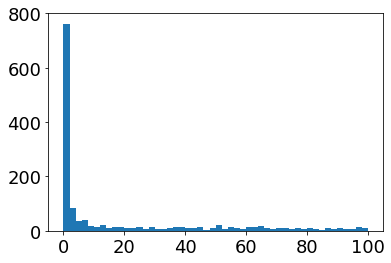

In [112]:
plt.hist(result[(result['test loss'] > 0) & (result['test loss'] < 100)]['test loss'], bins=50)

(array([743.,  10.,   8.,  12.,   1.,   0.,   9.,  22.,   8.,   1.,   1.,
          7.,   5.,   4.,   5.,   7.,  17.,  11.,   4.,   5.,   2.,   8.,
          6.,   0.,   5.,   5.,   8.,  13.,   8.,   5.,   4.,   2.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.]),
 array([1.47144046e-06, 2.69074317e-02, 5.38133919e-02, 8.07193521e-02,
        1.07625312e-01, 1.34531273e-01, 1.61437233e-01, 1.88343193e-01,
        2.15249153e-01, 2.42155113e-01, 2.69061074e-01, 2.95967034e-01,
        3.22872994e-01, 3.49778954e-01, 3.76684914e-01, 4.03590875e-01,
        4.30496835e-01, 4.57402795e-01, 4.84308755e-01, 5.11214716e-01,
        5.38120676e-01, 5.65026636e-01, 5.91932596e-01, 6.18838556e-01,
        6.45744517e-01, 6.72650477e-01, 6.99556437e-01, 7.26462397e-01,
        7.53368358e-01, 7.80274318e-01, 8.07180278e-01, 8.34086238e-01,
        8.60992198e-01, 8.87898159e-01, 9.14804119e-01, 9.41710079e-01,
        9.

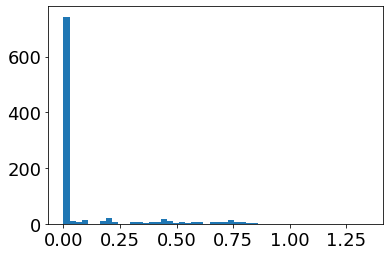

In [10]:
plt.hist(result['train loss'] / result['batchsize'], bins=50)

In [11]:
np.arange(1.0, 11.0)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [115]:
np.mean(result[momentum & (result['optim'] == 'gd') &
           (result['samplecomplexity'] == 2.5) & 
           (result['nhidden'] == 5) &
           (result['nesterov'] == False)]['test loss'] < 50)

0.75

In [117]:
result_mom

{(1, 2.0): 0.0,
 (1, 2.5): 0.0,
 (1, 3.0): 0.0,
 (1, 3.5): 0.0,
 (1, 4.0): 0.0,
 (2, 2.0): 0.0,
 (2, 2.5): 0.3,
 (2, 3.0): 0.75,
 (2, 3.5): 0.95,
 (2, 4.0): 1.0,
 (5, 2.0): 0.0,
 (5, 2.5): 0.75,
 (5, 3.0): 1.0,
 (5, 3.5): 1.0,
 (5, 4.0): 1.0,
 (10, 2.0): 0.0,
 (10, 2.5): 0.0,
 (10, 3.0): 1.0,
 (10, 3.5): 1.0,
 (10, 4.0): 1.0}

In [118]:
result_no_mom

{(1, 2.0): 0.0,
 (1, 2.5): 0.0,
 (1, 3.0): 0.0,
 (1, 3.5): 0.0,
 (1, 4.0): 0.0,
 (2, 2.0): 0.0,
 (2, 2.5): 0.25,
 (2, 3.0): 0.8,
 (2, 3.5): 1.0,
 (2, 4.0): 1.0,
 (5, 2.0): 0.0,
 (5, 2.5): 0.35,
 (5, 3.0): 1.0,
 (5, 3.5): 1.0,
 (5, 4.0): 1.0,
 (10, 2.0): 0.0,
 (10, 2.5): 0.0,
 (10, 3.0): 1.0,
 (10, 3.5): 1.0,
 (10, 4.0): 1.0}

In [119]:
vals = np.zeros((2, 11, 30))
for (nhidden, sc), value in result_no_mom.items():
    vals[0, nhidden, int(2 * sc + 0.1)] = value
    vals[1, nhidden, int(2 * sc + 0.1)] = result_mom[(nhidden, sc)]

In [38]:
vals = np.zeros((11, 30))
for _, row in result.iterrows():
    if row['lr'] == 0.01 and row['test loss'] < 50:
        vals[row['nhidden'] - 1, int(2 * (row['samplecomplexity']) + 0.1)] += 0.05

In [34]:
indices = [4, 5, 6, 7, 8]
xs = np.array(indices) / 2

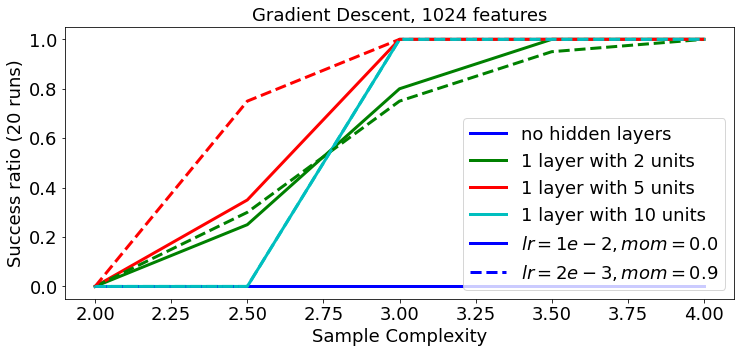

In [122]:
plt.figure(figsize=(12, 5))
plt.plot(xs, vals[0, 1, indices], color=colors[0], linewidth=3, label='no hidden layers')
plt.plot(xs, vals[0, 2, indices], color=colors[1], linewidth=3, label='1 layer with 2 units')
plt.plot(xs, vals[0, 5, indices], color=colors[2], linewidth=3, label='1 layer with 5 units')
plt.plot(xs, vals[0, 10, indices], color=colors[3], linewidth=3, label='1 layer with 10 units')
plt.plot([], [], color=colors[0], linewidth=3, label=r'$lr=1e-2, mom=0.0$')
plt.plot(xs, vals[1, 1, indices], '--', color=colors[0], linewidth=3, label=r'$lr=2e-3, mom=0.9$')
plt.plot(xs, vals[1, 2, indices], '--', color=colors[1], linewidth=3)
plt.plot(xs, vals[1, 5, indices], '--', color=colors[2], linewidth=3)
plt.plot(xs, vals[1, 10, indices], '--', color=colors[3], linewidth=3)
# plt.plot(xs, vals[10, indices], linewidth=3, label='1 hidden layer with 10 units')
plt.legend(loc='lower right')
plt.title('Gradient Descent, 1024 features')
plt.xlabel('Sample Complexity')
plt.ylabel('Success ratio (20 runs)')
# plt.savefig('gd_1024_features.pdf')
plt.show()

## SGD

In [181]:
momentum = ((result['optim'] == 'gd') & 
            (result['momentum'] == 0.9) & 
            (result['lr'] == 0.002) & 
            (result['nepochs'] == 10000))
no_momentum = ((result['optim'] == 'gd') & 
               (result['momentum'] == 0.0) & 
               (result['lr'] == 0.01) & 
               (result['nepochs'] == 10000))
momentum_sgd = ((result['optim'] == 'sgd') & 
                (result['momentum'] == 0.9) & 
                (result['lr'] == 0.002) & 
                (result['nepochs'] == 400))
no_momentum_sgd = ((result['optim'] == 'sgd') & 
                   (result['momentum'] == 0.0) & 
                   (result['lr'] == 0.01) & 
                   (result['nepochs'] == 400))

In [253]:
result_all = {}
for nhidden in [1, 2, 5, 10]:
    for sc in [2.0, 2.5, 3.0, 3.5, 4.0]:
        cur_result = result[(result['samplecomplexity'] == sc) & 
                            (result['nhidden'] == nhidden) &
                            (result['nesterov'] == False)]
        result_all[('mom_gd', nhidden, sc)] = np.mean(cur_result[momentum]['test loss'] < 1)
        result_all[('no_mom_gd', nhidden, sc)] = np.mean(cur_result[no_momentum]['test loss'] < 1)
        result_all[('mom_sgd', nhidden, sc)] = np.mean(cur_result[momentum_sgd]['test loss'] < 1)
        result_all[('no_mom_sgd', nhidden, sc)] = np.mean(cur_result[no_momentum_sgd]['test loss'] < 1)

<ipython-input-253-04cb1caebb74>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('mom_gd', nhidden, sc)] = np.mean(cur_result[momentum]['test loss'] < 1)
<ipython-input-253-04cb1caebb74>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('no_mom_gd', nhidden, sc)] = np.mean(cur_result[no_momentum]['test loss'] < 1)
<ipython-input-253-04cb1caebb74>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('mom_sgd', nhidden, sc)] = np.mean(cur_result[momentum_sgd]['test loss'] < 1)
<ipython-input-253-04cb1caebb74>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('no_mom_sgd', nhidden, sc)] = np.mean(cur_result[no_momentum_sgd]['test loss'] < 1)
<ipython-input-253-04cb1caebb74>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('mom_gd', nhidden, sc)] = np.mean(cur_result[momentum][

<ipython-input-253-04cb1caebb74>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('mom_gd', nhidden, sc)] = np.mean(cur_result[momentum]['test loss'] < 1)
<ipython-input-253-04cb1caebb74>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('no_mom_gd', nhidden, sc)] = np.mean(cur_result[no_momentum]['test loss'] < 1)
<ipython-input-253-04cb1caebb74>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('mom_sgd', nhidden, sc)] = np.mean(cur_result[momentum_sgd]['test loss'] < 1)
<ipython-input-253-04cb1caebb74>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('no_mom_sgd', nhidden, sc)] = np.mean(cur_result[no_momentum_sgd]['test loss'] < 1)
<ipython-input-253-04cb1caebb74>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('mom_gd', nhidden, sc)] = np.mean(cur_result[momentum][

In [254]:
vals = {'mom_gd': np.zeros((11, 30)), 
        'no_mom_gd': np.zeros((11, 30)), 
        'mom_sgd': np.zeros((11, 30)), 
        'no_mom_sgd': np.zeros((11, 30))}
for (alg, nhidden, sc), value in result_all.items():
    vals[alg][nhidden, int(2 * sc + 0.1)] = value
#     vals[0, nhidden, int(2 * sc + 0.1)] = value
#     vals[1, nhidden, int(2 * sc + 0.1)] = result_mom[(nhidden, sc)]

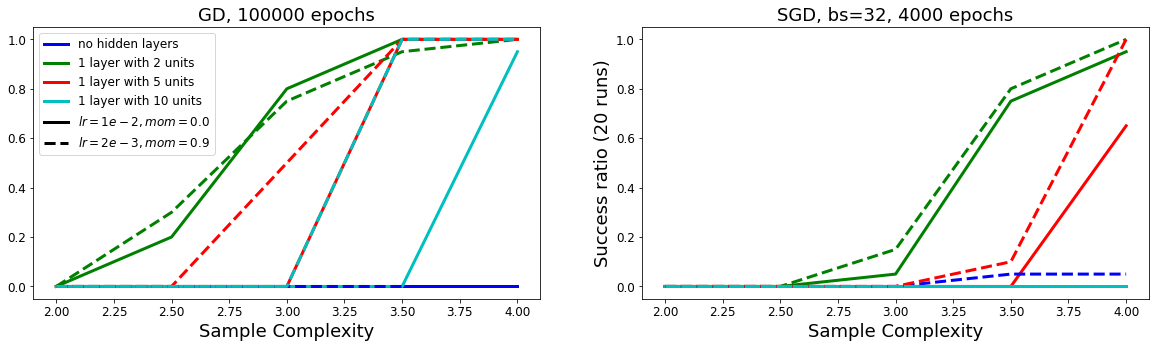

In [256]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
# plt.plot(xs, vals['no_mom_gd'][1, indices], color=colors[0], linewidth=3, label='no hidden layers')
# plt.plot(xs, vals['no_mom_gd'][2, indices], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['no_mom_gd'][5, indices], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_gd'][10, indices], color=colors[3], linewidth=3, label='1 layer with 10 units')
plt.plot(xs, vals['no_mom_gd'][1, indices], color=colors[0], linewidth=3, label='no hidden layers')
plt.plot(xs, vals['no_mom_gd'][2, indices], color=colors[1], linewidth=3, label='1 layer with 2 units')
plt.plot(xs, vals['no_mom_gd'][5, indices], color=colors[2], linewidth=3, label='1 layer with 5 units')
plt.plot(xs, vals['no_mom_gd'][10, indices], color=colors[3], linewidth=3, label='1 layer with 10 units')
plt.plot([], [], color='black', linewidth=3, label=r'$lr=1e-2, mom=0.0$')
plt.plot([], [], '--', color='black', linewidth=3, label=r'$lr=2e-3, mom=0.9$')
plt.plot(xs, vals['mom_gd'][1, indices], '--', color=colors[0], linewidth=3)
plt.plot(xs, vals['mom_gd'][2, indices], '--', color=colors[1], linewidth=3)
plt.plot(xs, vals['mom_gd'][5, indices], '--', color=colors[2], linewidth=3)
plt.plot(xs, vals['mom_gd'][10, indices], '--', color=colors[3], linewidth=3)
# plt.plot(xs, vals[10, indices], linewidth=3, label='1 hidden layer with 10 units')
# plt.plot(xs, vals['mom_gd'][1, indices], '--', color=colors[0], linewidth=3, label=r'$lr=2e-3, mom=0.9$')
# plt.plot(xs, vals['mom_gd'][2, indices], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['mom_gd'][5, indices], '--', color=colors[2], linewidth=3)
# plt.plot(xs, vals['mom_gd'][10, indices], '--', color=colors[3], linewidth=3)
# plt.plot(xs, vals[10, indices], linewidth=3, label='1 hidden layer with 10 units')
plt.legend(loc='upper left')
plt.title('GD, 100000 epochs')
plt.xlabel('Sample Complexity')
# plt.ylabel('Success ratio (20 runs)')
# plt.savefig('gd_1024_features.pdf')
# plt.show()

# plt.figure(figsize=(12, 5))
plt.subplot(122)
# plt.plot(xs, vals['no_mom_gd'][1, indices], color=colors[0], linewidth=3, label='no hidden layers')
# plt.plot(xs, vals['no_mom_gd'][2, indices], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['no_mom_gd'][5, indices], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_gd'][10, indices], color=colors[3], linewidth=3, label='1 layer with 10 units')
plt.plot(xs, vals['no_mom_sgd'][1, indices], color=colors[0], linewidth=3, label='no hidden layers')
plt.plot(xs, vals['no_mom_sgd'][2, indices], color=colors[1], linewidth=3, label='1 layer with 2 units')
plt.plot(xs, vals['no_mom_sgd'][5, indices], color=colors[2], linewidth=3, label='1 layer with 5 units')
plt.plot(xs, vals['no_mom_sgd'][10, indices], color=colors[3], linewidth=3, label='1 layer with 10 units')
plt.plot([], [], color='black', linewidth=3, label=r'$lr=1e-2, mom=0.0$')
plt.plot([], [], '--', color='black', linewidth=3, label=r'$lr=2e-3, mom=0.9$')
plt.plot(xs, vals['mom_sgd'][1, indices], '--', color=colors[0], linewidth=3)
plt.plot(xs, vals['mom_sgd'][2, indices], '--', color=colors[1], linewidth=3)
plt.plot(xs, vals['mom_sgd'][5, indices], '--', color=colors[2], linewidth=3)
plt.plot(xs, vals['mom_sgd'][10, indices], '--', color=colors[3], linewidth=3)
# plt.plot(xs, vals[10, indices], linewidth=3, label='1 hidden layer with 10 units')
# plt.plot(xs, vals['mom_gd'][1, indices], '--', color=colors[0], linewidth=3, label=r'$lr=2e-3, mom=0.9$')
# plt.plot(xs, vals['mom_gd'][2, indices], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['mom_gd'][5, indices], '--', color=colors[2], linewidth=3)
# plt.plot(xs, vals['mom_gd'][10, indices], '--', color=colors[3], linewidth=3)
# plt.plot(xs, vals[10, indices], linewidth=3, label='1 hidden layer with 10 units')
# plt.legend(loc='upper left')
plt.title('SGD, bs=32, 4000 epochs')
plt.xlabel('Sample Complexity')
plt.ylabel('Success ratio (20 runs)')
plt.savefig('comp_1024_features.pdf')
plt.show()

(array([5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        1., 1., 0., 0., 1., 3., 0., 0., 2., 0., 0., 0., 0., 0., 0., 1., 2.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1.51839226e-01, 1.79294506e+01, 3.57070620e+01, 5.34846735e+01,
        7.12622849e+01, 8.90398963e+01, 1.06817508e+02, 1.24595119e+02,
        1.42372730e+02, 1.60150342e+02, 1.77927953e+02, 1.95705565e+02,
        2.13483176e+02, 2.31260788e+02, 2.49038399e+02, 2.66816010e+02,
        2.84593622e+02, 3.02371233e+02, 3.20148845e+02, 3.37926456e+02,
        3.55704067e+02, 3.73481679e+02, 3.91259290e+02, 4.09036902e+02,
        4.26814513e+02, 4.44592124e+02, 4.62369736e+02, 4.80147347e+02,
        4.97924959e+02, 5.15702570e+02, 5.33480181e+02, 5.51257793e+02,
        5.69035404e+02, 5.86813016e+02, 6.04590627e+02, 6.22368239e+02,
        6.40145850e+02, 6.57923461e+02, 6.75701073e+02, 6.93478684e+02,
        7.11256296e+02, 7.29033907e+02, 7.46811518e+02

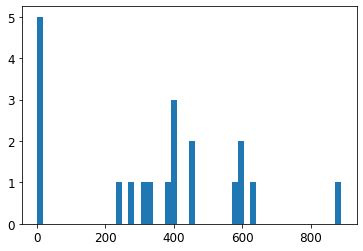

In [215]:
plt.hist(result[no_momentum & (result['samplecomplexity'] == 2.5) & 
                            (result['nhidden'] == 2) &
                            (result['nesterov'] == False)]['test loss'], bins=50)

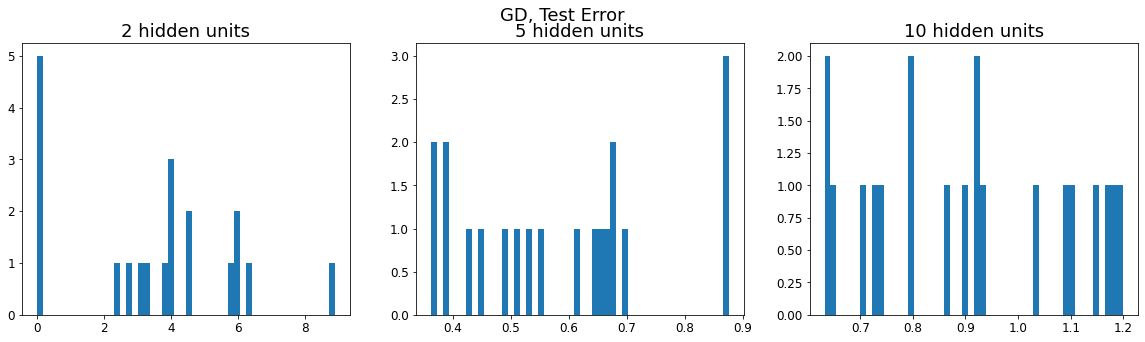

In [252]:
plt.figure(figsize=(20, 5))
plt.suptitle('GD, Test Error')
plt.subplot(131)
plt.title('2 hidden units')
plt.hist(result[no_momentum & (result['samplecomplexity'] == 2.5) & 
                            (result['nhidden'] == 2) &
                            (result['nesterov'] == False)]['test loss'] / 100, bins=50)
plt.subplot(132)
plt.title('5 hidden units')
plt.hist(result[no_momentum & (result['samplecomplexity'] == 2.5) & 
                            (result['nhidden'] == 5) &
                            (result['nesterov'] == False)]['test loss'] / 100, bins=50)
plt.subplot(133)
plt.title('10 hidden units')
plt.hist(result[no_momentum & (result['samplecomplexity'] == 2.5) & 
                            (result['nhidden'] == 10) &
                            (result['nesterov'] == False)]['test loss'] / 100, bins=50)

plt.savefig('test_error_hist.pdf')
plt.show()

In [180]:
result[no_momentum_sgd &
                    (result['samplecomplexity'] == 3.5) & 
                    (result['nhidden'] == 10) &
                    (result['nesterov'] == False)]

,Unnamed: 0,optim,samplecomplexity,nfeatures,nhidden,batchsize,lr,momentum,nesterov,nepochs,weightdecay,ntest,startseed,nruns,seed,epoch,train loss,test loss
61,0,sgd,3.5,1024,10,32,0.01,0.0,False,400,0,100,32,5,33,3900,0.112005,9.231484
62,1,sgd,3.5,1024,10,32,0.01,0.0,False,400,0,100,32,5,34,3900,0.131989,9.806463
63,2,sgd,3.5,1024,10,32,0.01,0.0,False,400,0,100,32,5,35,3900,0.108405,9.299334
64,3,sgd,3.5,1024,10,32,0.01,0.0,False,400,0,100,32,5,36,3900,0.138274,11.769840
65,4,sgd,3.5,1024,10,32,0.01,0.0,False,400,0,100,32,5,37,3900,0.170962,13.803942
372,0,sgd,3.5,1024,10,32,0.01,0.0,False,400,0,100,22,5,23,3900,0.119541,13.379031
373,1,sgd,3.5,1024,10,32,0.01,0.0,False,400,0,100,22,5,24,3900,0.219305,20.217429
374,2,sgd,3.5,1024,10,32,0.01,0.0,False,400,0,100,22,5,25,3900,0.126549,12.928362
375,3,sgd,3.5,1024,10,32,0.01,0.0,False,400,0,100,22,5,26,3900,0.119354,11.915478
376,4,sgd,3.5,1024,10,32,0.01,0.0,False,400,0,100,22,5,27,3900,0.117876,11.877522


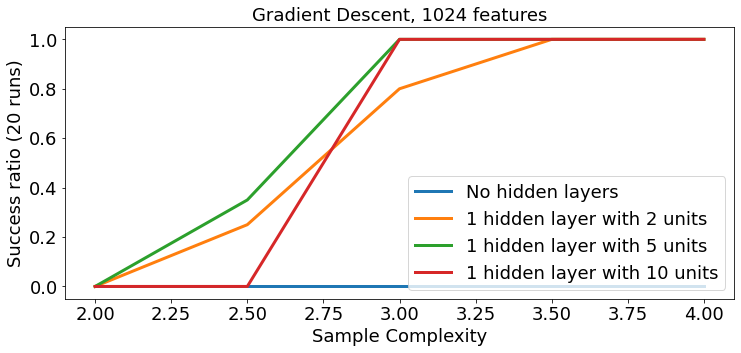

In [40]:
plt.figure(figsize=(12, 5))
plt.plot(xs, vals[0, indices], linewidth=3, label='No hidden layers')
plt.plot(xs, vals[1, indices], linewidth=3, label='1 hidden layer with 2 units')
plt.plot(xs, vals[4, indices], linewidth=3, label='1 hidden layer with 5 units')
plt.plot(xs, vals[9, indices], linewidth=3, label='1 hidden layer with 10 units')
plt.legend(loc='lower right')
plt.title('Gradient Descent, 1024 features')
plt.xlabel('Sample Complexity')
plt.ylabel('Success ratio (20 runs)')
plt.savefig('gd_1024_features.pdf')
plt.show()

# PSGD

In [115]:
result = pd.read_csv('psgd_1024.csv')
momentum_sgd = ((result['optim'] == 'sgd') & 
            (result['momentum'] == 0.9) & 
            (result['lr'] == 0.002) & 
            (result['nepochs'] == 2000))
momentum_psgd = ((result['optim'] == 'p-sgd') &
            (result['momentum'] == 0.9) & 
            (result['lr'] == 0.002) & 
            (result['nepochs'] == 2000))
no_momentum_sgd = ((result['optim'] == 'sgd') & 
               (result['momentum'] == 0.0) & 
               (result['lr'] == 0.01) & 
               (result['nepochs'] == 2000))
no_momentum_psgd = ((result['optim'] == 'p-sgd') & 
               (result['momentum'] == 0.0) & 
               (result['lr'] == 0.01) & 
               (result['nepochs'] == 2000))
result_all = {}
result_all = {}
for nhidden in [1, 2, 5, 10]:
    for sc in [2.0, 2.5, 3.0, 3.5, 4.0]:
        for tau in [0.5, 1.0, 2.0]:
            cur_result = result[(result['tau'] == tau) & 
                                (result['samplecomplexity'] == sc) & 
                                (result['nhidden'] == nhidden) &
                                (result['nesterov'] == False)]
            result_all[('mom_sgd', nhidden, sc, tau)] = np.mean(cur_result[momentum_sgd]['test error'] < 0.01)
            result_all[('mom_psgd', nhidden, sc, tau)] = np.mean(cur_result[momentum_psgd]['test error'] < 0.01)
            result_all[('no_mom_sgd', nhidden, sc, tau)] = np.mean(cur_result[no_momentum_sgd]['test error'] < 0.01)
            result_all[('no_mom_psgd', nhidden, sc, tau)] = np.mean(cur_result[no_momentum_psgd]['test error'] < 0.01)
        
vals = {'mom_sgd': np.zeros((11, 30, 5)), 
        'mom_psgd': np.zeros((11, 30, 5)),
        'no_mom_sgd': np.zeros((11, 30, 5)),
        'no_mom_psgd': np.zeros((11, 30, 5))}
for (alg, nhidden, sc, tau), value in result_all.items():
    vals[alg][nhidden, int(2 * sc + 0.1), int(2 * tau + 0.1)] = value
#     vals[0, nhidden, int(2 * sc + 0.1)] = value
#     vals[1, nhidden, int(2 * sc + 0.1)] = result_mom[(nhidden, sc)]

<ipython-input-115-d445866adc6d>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('mom_sgd', nhidden, sc, tau)] = np.mean(cur_result[momentum_sgd]['test error'] < 0.01)
<ipython-input-115-d445866adc6d>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('mom_psgd', nhidden, sc, tau)] = np.mean(cur_result[momentum_psgd]['test error'] < 0.01)
<ipython-input-115-d445866adc6d>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('no_mom_sgd', nhidden, sc, tau)] = np.mean(cur_result[no_momentum_sgd]['test error'] < 0.01)
<ipython-input-115-d445866adc6d>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('no_mom_psgd', nhidden, sc, tau)] = np.mean(cur_result[no_momentum_psgd]['test error'] < 0.01)
<ipython-input-115-d445866adc6d>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('

<ipython-input-115-d445866adc6d>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('no_mom_psgd', nhidden, sc, tau)] = np.mean(cur_result[no_momentum_psgd]['test error'] < 0.01)
<ipython-input-115-d445866adc6d>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('mom_sgd', nhidden, sc, tau)] = np.mean(cur_result[momentum_sgd]['test error'] < 0.01)
<ipython-input-115-d445866adc6d>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('mom_psgd', nhidden, sc, tau)] = np.mean(cur_result[momentum_psgd]['test error'] < 0.01)
<ipython-input-115-d445866adc6d>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('no_mom_sgd', nhidden, sc, tau)] = np.mean(cur_result[no_momentum_sgd]['test error'] < 0.01)
<ipython-input-115-d445866adc6d>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('

<ipython-input-115-d445866adc6d>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('mom_sgd', nhidden, sc, tau)] = np.mean(cur_result[momentum_sgd]['test error'] < 0.01)
<ipython-input-115-d445866adc6d>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('mom_psgd', nhidden, sc, tau)] = np.mean(cur_result[momentum_psgd]['test error'] < 0.01)
<ipython-input-115-d445866adc6d>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('no_mom_sgd', nhidden, sc, tau)] = np.mean(cur_result[no_momentum_sgd]['test error'] < 0.01)
<ipython-input-115-d445866adc6d>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('no_mom_psgd', nhidden, sc, tau)] = np.mean(cur_result[no_momentum_psgd]['test error'] < 0.01)
<ipython-input-115-d445866adc6d>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('

<ipython-input-115-d445866adc6d>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('mom_sgd', nhidden, sc, tau)] = np.mean(cur_result[momentum_sgd]['test error'] < 0.01)
<ipython-input-115-d445866adc6d>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('mom_psgd', nhidden, sc, tau)] = np.mean(cur_result[momentum_psgd]['test error'] < 0.01)
<ipython-input-115-d445866adc6d>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('no_mom_sgd', nhidden, sc, tau)] = np.mean(cur_result[no_momentum_sgd]['test error'] < 0.01)
<ipython-input-115-d445866adc6d>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('no_mom_psgd', nhidden, sc, tau)] = np.mean(cur_result[no_momentum_psgd]['test error'] < 0.01)
<ipython-input-115-d445866adc6d>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_all[('

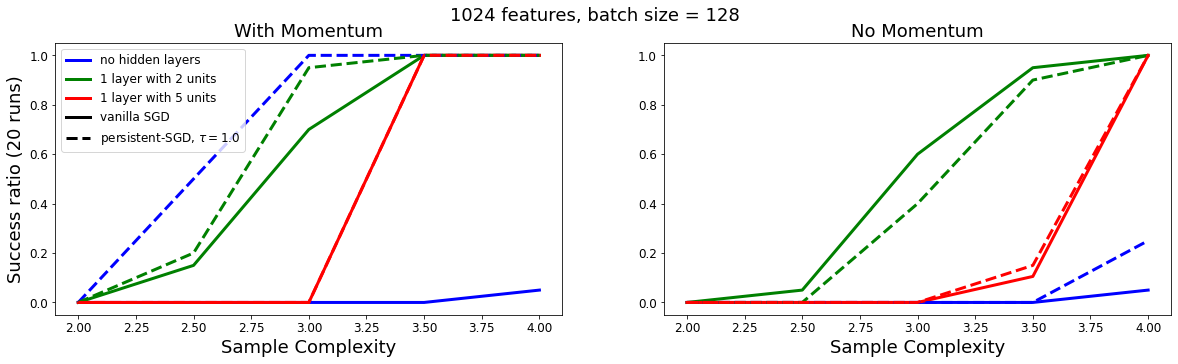

In [121]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.title('With Momentum')
plt.plot(xs, vals['mom_sgd'][1, indices, 2], color=colors[0], linewidth=3, label='no hidden layers')
plt.plot(xs, vals['mom_sgd'][2, indices, 2], color=colors[1], linewidth=3, label='1 layer with 2 units')
plt.plot(xs, vals['mom_sgd'][5, indices, 2], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_sgd'][10, indices, 2], color=colors[3], linewidth=3, label='1 layer with 10 units')
plt.plot([], [], color='black', linewidth=3, label=r'vanilla SGD')
plt.plot([], [], '--', color='black', linewidth=3, label=r'persistent-SGD, $\tau = 1.0$')
plt.plot(xs, vals['mom_psgd'][1, indices, 2], '--', color=colors[0], linewidth=3)
plt.plot(xs, vals['mom_psgd'][2, indices, 2], '--', color=colors[1], linewidth=3)
plt.plot(xs, vals['mom_psgd'][5, indices, 2], '--', color=colors[2], linewidth=3)
plt.legend(loc='upper left')
plt.suptitle('1024 features, batch size = 128')
plt.xlabel('Sample Complexity')
plt.ylabel('Success ratio (20 runs)')
# plt.savefig('gd_1024_features.pdf')
# plt.show()

# plt.figure(figsize=(12, 5))
plt.subplot(122)
plt.title('No Momentum')
plt.plot(xs, vals['no_mom_sgd'][1, indices, 2], color=colors[0], linewidth=3, label='no hidden layers')
plt.plot(xs, vals['no_mom_sgd'][2, indices, 2], color=colors[1], linewidth=3, label='1 layer with 2 units')
plt.plot(xs, vals['no_mom_sgd'][5, indices, 2], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_sgd'][10, indices, 2], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot([], [], color='black', linewidth=3, label=r'vanilla SGD')
# plt.plot([], [], '--', color='black', linewidth=3, label=r'persistent-SGD, $\tau = 1.0$')
plt.plot(xs, vals['no_mom_psgd'][1, indices, 2], '--', color=colors[0], linewidth=3)
plt.plot(xs, vals['no_mom_psgd'][2, indices, 2], '--', color=colors[1], linewidth=3)
plt.plot(xs, vals['no_mom_psgd'][5, indices, 2], '--', color=colors[2], linewidth=3)
# # plt.legend(loc='upper left')
# plt.title('SGD, bs=32, 4000 epochs')
plt.xlabel('Sample Complexity')
# plt.ylabel('Success ratio (20 runs)')
# plt.savefig('comp_1024_features.pdf')
plt.show()

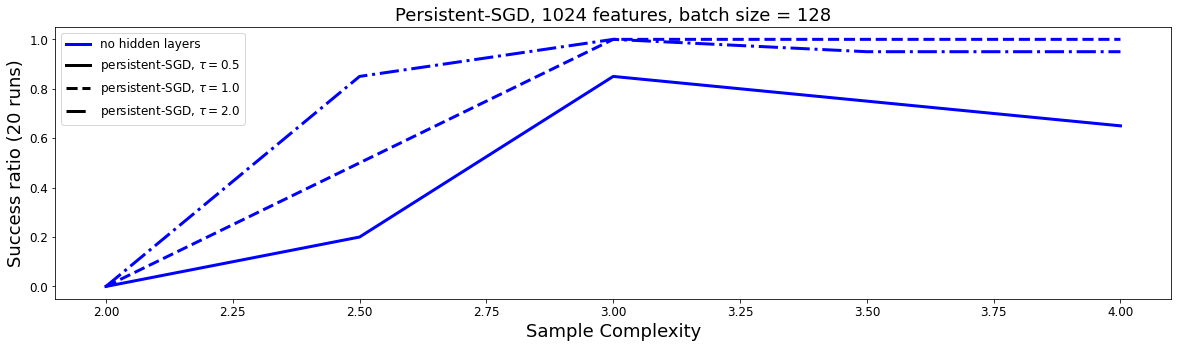

In [73]:
plt.figure(figsize=(20, 5))
plt.subplot(111)
# plt.plot(xs, vals['no_mom_gd'][1, indices], color=colors[0], linewidth=3, label='no hidden layers')
# plt.plot(xs, vals['no_mom_gd'][2, indices], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['no_mom_gd'][5, indices], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_gd'][10, indices], color=colors[3], linewidth=3, label='1 layer with 10 units')
plt.plot(xs, vals['mom_psgd'][1, indices, 1], color=colors[0], linewidth=3, label='no hidden layers')
# plt.plot(xs, vals['mom_psgd'][2, indices, 1], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['mom_psgd'][10, indices, 1], color=colors[3], linewidth=3, label='1 layer with 10 units')
plt.plot([], [], color='black', linewidth=3, label=r'persistent-SGD, $\tau = 0.5$')
plt.plot([], [], '--', color='black', linewidth=3, label=r'persistent-SGD, $\tau = 1.0$')
plt.plot([], [], '-.', color='black', linewidth=3, label=r'persistent-SGD, $\tau = 2.0$')
plt.plot(xs, vals['mom_psgd'][1, indices, 2], '--', color=colors[0], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][2, indices, 2], '--', color=colors[1], linewidth=3)

plt.plot(xs, vals['mom_psgd'][1, indices, 4], '-.', color=colors[0], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][2, indices, 4], '-.', color=colors[1], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][10, indices, 2], '--', color=colors[3], linewidth=3)
# plt.plot(xs, vals[10, indices], linewidth=3, label='1 hidden layer with 10 units')
# plt.plot(xs, vals['mom_gd'][1, indices], '--', color=colors[0], linewidth=3, label=r'$lr=2e-3, mom=0.9$')
# plt.plot(xs, vals['mom_gd'][2, indices], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['mom_gd'][5, indices], '--', color=colors[2], linewidth=3)
# plt.plot(xs, vals['mom_gd'][10, indices], '--', color=colors[3], linewidth=3)
# plt.plot(xs, vals[10, indices], linewidth=3, label='1 hidden layer with 10 units')
plt.legend(loc='upper left')
plt.title('Persistent-SGD, 1024 features, batch size = 128')
plt.xlabel('Sample Complexity')
plt.ylabel('Success ratio (20 runs)')
# plt.savefig('gd_1024_features.pdf')
plt.show()

# plt.figure(figsize=(12, 5))
# plt.subplot(122)
# # plt.plot(xs, vals['no_mom_gd'][1, indices], color=colors[0], linewidth=3, label='no hidden layers')
# # plt.plot(xs, vals['no_mom_gd'][2, indices], color=colors[1], linewidth=3, label='1 layer with 2 units')
# # plt.plot(xs, vals['no_mom_gd'][5, indices], color=colors[2], linewidth=3, label='1 layer with 5 units')
# # plt.plot(xs, vals['no_mom_gd'][10, indices], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot(xs, vals['no_mom_sgd'][1, indices], color=colors[0], linewidth=3, label='no hidden layers')
# plt.plot(xs, vals['no_mom_sgd'][2, indices], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['no_mom_sgd'][5, indices], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_sgd'][10, indices], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot([], [], color='black', linewidth=3, label=r'$lr=1e-2, mom=0.0$')
# plt.plot([], [], '--', color='black', linewidth=3, label=r'$lr=2e-3, mom=0.9$')
# plt.plot(xs, vals['mom_sgd'][1, indices], '--', color=colors[0], linewidth=3)
# plt.plot(xs, vals['mom_sgd'][2, indices], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['mom_sgd'][5, indices], '--', color=colors[2], linewidth=3)
# plt.plot(xs, vals['mom_sgd'][10, indices], '--', color=colors[3], linewidth=3)
# # plt.plot(xs, vals[10, indices], linewidth=3, label='1 hidden layer with 10 units')
# # plt.plot(xs, vals['mom_gd'][1, indices], '--', color=colors[0], linewidth=3, label=r'$lr=2e-3, mom=0.9$')
# # plt.plot(xs, vals['mom_gd'][2, indices], '--', color=colors[1], linewidth=3)
# # plt.plot(xs, vals['mom_gd'][5, indices], '--', color=colors[2], linewidth=3)
# # plt.plot(xs, vals['mom_gd'][10, indices], '--', color=colors[3], linewidth=3)
# # plt.plot(xs, vals[10, indices], linewidth=3, label='1 hidden layer with 10 units')
# # plt.legend(loc='upper left')
# plt.title('SGD, bs=32, 4000 epochs')
# plt.xlabel('Sample Complexity')
# plt.ylabel('Success ratio (20 runs)')
# plt.savefig('comp_1024_features.pdf')
# plt.show()

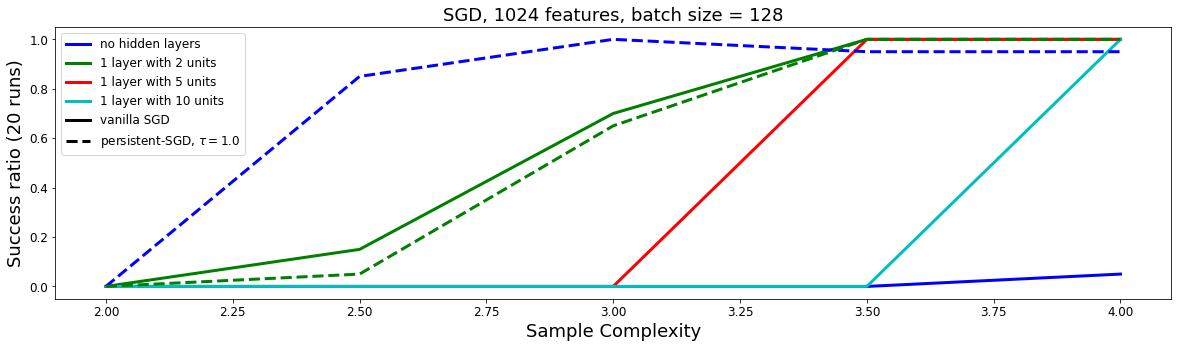

In [50]:
plt.figure(figsize=(20, 5))
plt.subplot(111)
# plt.plot(xs, vals['no_mom_gd'][1, indices], color=colors[0], linewidth=3, label='no hidden layers')
# plt.plot(xs, vals['no_mom_gd'][2, indices], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['no_mom_gd'][5, indices], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_gd'][10, indices], color=colors[3], linewidth=3, label='1 layer with 10 units')
plt.plot(xs, vals['mom_sgd'][1, indices], color=colors[0], linewidth=3, label='no hidden layers')
plt.plot(xs, vals['mom_sgd'][2, indices], color=colors[1], linewidth=3, label='1 layer with 2 units')
plt.plot(xs, vals['mom_sgd'][5, indices], color=colors[2], linewidth=3, label='1 layer with 5 units')
plt.plot(xs, vals['mom_sgd'][10, indices], color=colors[3], linewidth=3, label='1 layer with 10 units')
plt.plot([], [], color='black', linewidth=3, label=r'vanilla SGD')
plt.plot([], [], '--', color='black', linewidth=3, label=r'persistent-SGD, $\tau = 1.0$')
plt.plot(xs, vals['mom_psgd'][1, indices], '--', color=colors[0], linewidth=3)
plt.plot(xs, vals['mom_psgd'][2, indices], '--', color=colors[1], linewidth=3)
plt.plot(xs, vals['mom_psgd'][5, indices], '*', color=colors[2], linewidth=3)
plt.plot(xs, vals['mom_psgd'][10, indices], '*', color=colors[3], linewidth=3)
# plt.plot(xs, vals[10, indices], linewidth=3, label='1 hidden layer with 10 units')
# plt.plot(xs, vals['mom_gd'][1, indices], '--', color=colors[0], linewidth=3, label=r'$lr=2e-3, mom=0.9$')
# plt.plot(xs, vals['mom_gd'][2, indices], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['mom_gd'][5, indices], '--', color=colors[2], linewidth=3)
# plt.plot(xs, vals['mom_gd'][10, indices], '--', color=colors[3], linewidth=3)
# plt.plot(xs, vals[10, indices], linewidth=3, label='1 hidden layer with 10 units')
plt.legend(loc='upper left')
plt.title('SGD, 1024 features, batch size = 128')
plt.xlabel('Sample Complexity')
plt.ylabel('Success ratio (20 runs)')
# plt.savefig('gd_1024_features.pdf')
plt.show()

# plt.figure(figsize=(12, 5))
# plt.subplot(122)
# # plt.plot(xs, vals['no_mom_gd'][1, indices], color=colors[0], linewidth=3, label='no hidden layers')
# # plt.plot(xs, vals['no_mom_gd'][2, indices], color=colors[1], linewidth=3, label='1 layer with 2 units')
# # plt.plot(xs, vals['no_mom_gd'][5, indices], color=colors[2], linewidth=3, label='1 layer with 5 units')
# # plt.plot(xs, vals['no_mom_gd'][10, indices], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot(xs, vals['no_mom_sgd'][1, indices], color=colors[0], linewidth=3, label='no hidden layers')
# plt.plot(xs, vals['no_mom_sgd'][2, indices], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['no_mom_sgd'][5, indices], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_sgd'][10, indices], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot([], [], color='black', linewidth=3, label=r'$lr=1e-2, mom=0.0$')
# plt.plot([], [], '--', color='black', linewidth=3, label=r'$lr=2e-3, mom=0.9$')
# plt.plot(xs, vals['mom_sgd'][1, indices], '--', color=colors[0], linewidth=3)
# plt.plot(xs, vals['mom_sgd'][2, indices], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['mom_sgd'][5, indices], '--', color=colors[2], linewidth=3)
# plt.plot(xs, vals['mom_sgd'][10, indices], '--', color=colors[3], linewidth=3)
# # plt.plot(xs, vals[10, indices], linewidth=3, label='1 hidden layer with 10 units')
# # plt.plot(xs, vals['mom_gd'][1, indices], '--', color=colors[0], linewidth=3, label=r'$lr=2e-3, mom=0.9$')
# # plt.plot(xs, vals['mom_gd'][2, indices], '--', color=colors[1], linewidth=3)
# # plt.plot(xs, vals['mom_gd'][5, indices], '--', color=colors[2], linewidth=3)
# # plt.plot(xs, vals['mom_gd'][10, indices], '--', color=colors[3], linewidth=3)
# # plt.plot(xs, vals[10, indices], linewidth=3, label='1 hidden layer with 10 units')
# # plt.legend(loc='upper left')
# plt.title('SGD, bs=32, 4000 epochs')
# plt.xlabel('Sample Complexity')
# plt.ylabel('Success ratio (20 runs)')
# plt.savefig('comp_1024_features.pdf')
# plt.show()

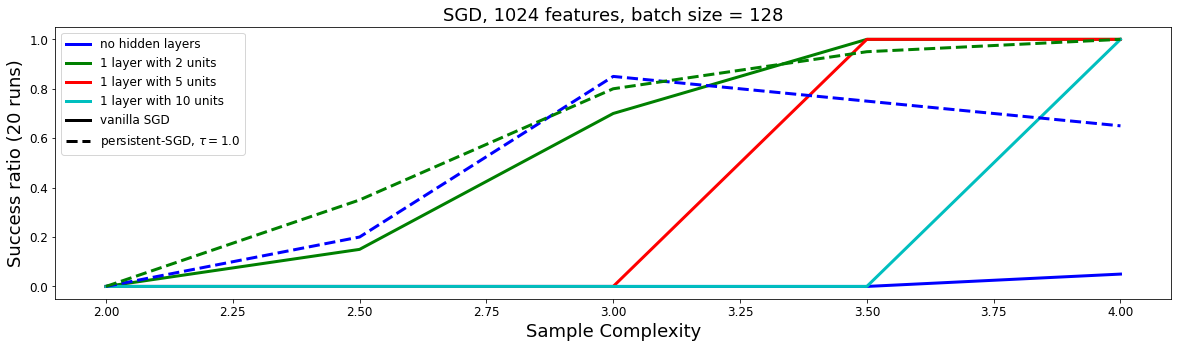

In [48]:
plt.figure(figsize=(20, 5))
plt.subplot(111)
# plt.plot(xs, vals['no_mom_gd'][1, indices], color=colors[0], linewidth=3, label='no hidden layers')
# plt.plot(xs, vals['no_mom_gd'][2, indices], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['no_mom_gd'][5, indices], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_gd'][10, indices], color=colors[3], linewidth=3, label='1 layer with 10 units')
plt.plot(xs, vals['mom_sgd'][1, indices], color=colors[0], linewidth=3, label='no hidden layers')
plt.plot(xs, vals['mom_sgd'][2, indices], color=colors[1], linewidth=3, label='1 layer with 2 units')
plt.plot(xs, vals['mom_sgd'][5, indices], color=colors[2], linewidth=3, label='1 layer with 5 units')
plt.plot(xs, vals['mom_sgd'][10, indices], color=colors[3], linewidth=3, label='1 layer with 10 units')
plt.plot([], [], color='black', linewidth=3, label=r'vanilla SGD')
plt.plot([], [], '--', color='black', linewidth=3, label=r'persistent-SGD, $\tau = 1.0$')
plt.plot(xs, vals['mom_psgd'][1, indices], '--', color=colors[0], linewidth=3)
plt.plot(xs, vals['mom_psgd'][2, indices], '--', color=colors[1], linewidth=3)
plt.plot(xs, vals['mom_psgd'][5, indices], '*', color=colors[2], linewidth=3)
plt.plot(xs, vals['mom_psgd'][10, indices], '*', color=colors[3], linewidth=3)
# plt.plot(xs, vals[10, indices], linewidth=3, label='1 hidden layer with 10 units')
# plt.plot(xs, vals['mom_gd'][1, indices], '--', color=colors[0], linewidth=3, label=r'$lr=2e-3, mom=0.9$')
# plt.plot(xs, vals['mom_gd'][2, indices], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['mom_gd'][5, indices], '--', color=colors[2], linewidth=3)
# plt.plot(xs, vals['mom_gd'][10, indices], '--', color=colors[3], linewidth=3)
# plt.plot(xs, vals[10, indices], linewidth=3, label='1 hidden layer with 10 units')
plt.legend(loc='upper left')
plt.title('SGD, 1024 features, batch size = 128')
plt.xlabel('Sample Complexity')
plt.ylabel('Success ratio (20 runs)')
# plt.savefig('gd_1024_features.pdf')
plt.show()

# plt.figure(figsize=(12, 5))
# plt.subplot(122)
# # plt.plot(xs, vals['no_mom_gd'][1, indices], color=colors[0], linewidth=3, label='no hidden layers')
# # plt.plot(xs, vals['no_mom_gd'][2, indices], color=colors[1], linewidth=3, label='1 layer with 2 units')
# # plt.plot(xs, vals['no_mom_gd'][5, indices], color=colors[2], linewidth=3, label='1 layer with 5 units')
# # plt.plot(xs, vals['no_mom_gd'][10, indices], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot(xs, vals['no_mom_sgd'][1, indices], color=colors[0], linewidth=3, label='no hidden layers')
# plt.plot(xs, vals['no_mom_sgd'][2, indices], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['no_mom_sgd'][5, indices], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_sgd'][10, indices], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot([], [], color='black', linewidth=3, label=r'$lr=1e-2, mom=0.0$')
# plt.plot([], [], '--', color='black', linewidth=3, label=r'$lr=2e-3, mom=0.9$')
# plt.plot(xs, vals['mom_sgd'][1, indices], '--', color=colors[0], linewidth=3)
# plt.plot(xs, vals['mom_sgd'][2, indices], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['mom_sgd'][5, indices], '--', color=colors[2], linewidth=3)
# plt.plot(xs, vals['mom_sgd'][10, indices], '--', color=colors[3], linewidth=3)
# # plt.plot(xs, vals[10, indices], linewidth=3, label='1 hidden layer with 10 units')
# # plt.plot(xs, vals['mom_gd'][1, indices], '--', color=colors[0], linewidth=3, label=r'$lr=2e-3, mom=0.9$')
# # plt.plot(xs, vals['mom_gd'][2, indices], '--', color=colors[1], linewidth=3)
# # plt.plot(xs, vals['mom_gd'][5, indices], '--', color=colors[2], linewidth=3)
# # plt.plot(xs, vals['mom_gd'][10, indices], '--', color=colors[3], linewidth=3)
# # plt.plot(xs, vals[10, indices], linewidth=3, label='1 hidden layer with 10 units')
# # plt.legend(loc='upper left')
# plt.title('SGD, bs=32, 4000 epochs')
# plt.xlabel('Sample Complexity')
# plt.ylabel('Success ratio (20 runs)')
# plt.savefig('comp_1024_features.pdf')
# plt.show()

# Symmetric Binary Door

In [77]:
result = pd.read_csv('symm_1024.csv')

In [79]:
np.unique(result['nesterov'])

array([False,  True])

In [80]:
result['symmetric_door_k']

0       0.67449
1       0.67449
2       0.67449
3       0.67449
4       0.67449
         ...   
4141    0.50000
4142    0.50000
4143    0.50000
4144    0.50000
4145    0.50000
Name: symmetric_door_k, Length: 4146, dtype: float64

In [106]:
result = pd.read_csv('symm_1024.csv')
van_momentum = ((result['momentum'] == 0.9) & 
            (result['lr'] == 0.002) & 
            (result['nepochs'] == 2000) &
            (result['nesterov'] == False))
nes_momentum = ((result['momentum'] == 0.9) & 
            (result['lr'] == 0.002) & 
            (result['nepochs'] == 2000) &
            (result['nesterov'] == True))
no_momentum = ((result['momentum'] == 0.0) & 
               (result['lr'] == 0.01) & 
               (result['nepochs'] == 2000))
result_all = {}
for nhidden in [1]:
    for sc in [0.1, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 15.0, 20.0, 25.0]:
        for tau in [1.0]:
            for k in [0.67449]:
                for optim in ['gd', 'sgd', 'p-sgd']:
                    for loss in ['logloss', 'square']:
                        cur_result = result[(result['loss'] == loss) & 
                                            (result['optim'] == optim) & 
                                            (result['tau'] == tau) & 
                                            (result['samplecomplexity'] == sc) & 
                                            (result['nhidden'] == nhidden) &
                                            (np.abs(result['symmetric_door_k'] - k) < 1e-3)]
                        #TODO!!!!!
                        for dataset in ['train', 'test']:
                            result_all[(dataset,
                                        'van_mom',
                                        loss,
                                        optim, 
                                        nhidden, 
                                        sc, 
                                        tau, 
                                        k)] = np.mean(cur_result[van_momentum][f'{dataset} error']) / 2
                            result_all[(dataset,
                                        'nes_mom', 
                                        loss,
                                        optim, 
                                        nhidden, 
                                        sc, 
                                        tau, 
                                        k)] = np.mean(cur_result[nes_momentum][f'{dataset} error']) / 2
                            result_all[(dataset,
                                        'no_mom', 
                                        loss,
                                        optim, 
                                        nhidden, 
                                        sc, 
                                        tau, 
                                        k)] = np.mean(cur_result[no_momentum][f'{dataset} error']) / 2
vals = {}      
for optim_type in ['van_mom', 'nes_mom', 'no_mom']:
    for optim in ['gd', 'sgd', 'p-sgd']:
        for loss in ['logloss', 'square']:
            vals[(optim_type, optim)] = np.zeros((2, 2, 100))
for (dataset, optim_type, loss, optim, _, sc, _, _), value in result_all.items():
#     print(int(dataset == 'test'), sc)
#     print(vals[(optim_type, optim)][dataset == 'test', 3])
    vals[(optim_type, optim)][int(dataset == 'test'), int(loss == 'logloss'), int(2 * sc + 0.1)] = value

<ipython-input-106-0d3feb9cf3bb>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[van_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[van_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:51: UserWarning: Boolean Series key will be reindexed to match DataFrame 

<ipython-input-106-0d3feb9cf3bb>:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[van_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame i

<ipython-input-106-0d3feb9cf3bb>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[van_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[van_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:51: UserWarning: Boolean Series key will be reindexed to match DataFrame 

<ipython-input-106-0d3feb9cf3bb>:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[van_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame i

<ipython-input-106-0d3feb9cf3bb>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[van_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[van_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset} error']) / 2
<ipython-input-106-0d3feb9cf3bb>:51: UserWarning: Boolean Series key will be reindexed to match DataFrame 

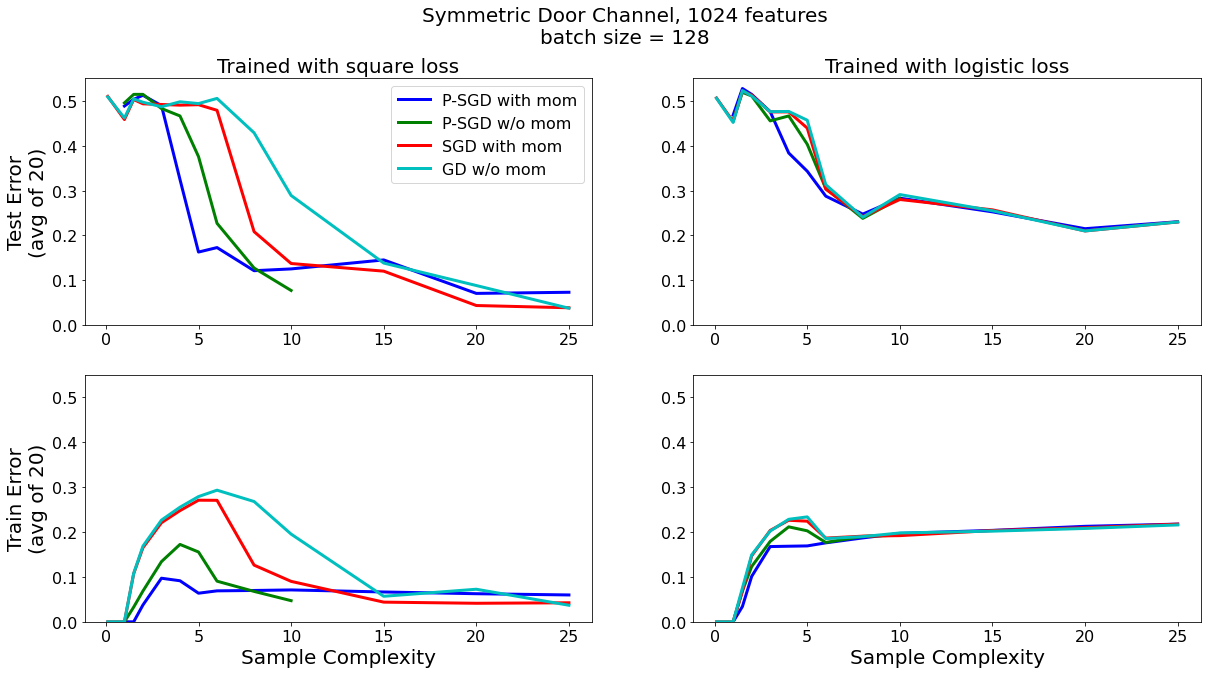

In [110]:
xs = [0.1, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 15.0, 20.0, 25.0]
indices = np.array(np.array(xs) * 2 + 0.1, 
                   dtype=int)
plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.title('Trained with square loss')
plt.plot(xs, vals[('van_mom', 'p-sgd')][1, 0, indices], color=colors[0], linewidth=3, label='P-SGD with mom')
plt.plot(xs, vals[('no_mom', 'p-sgd')][1, 0, indices], color=colors[1], linewidth=3, label='P-SGD w/o mom')
plt.plot(xs, vals[('van_mom', 'sgd')][1, 0, indices], color=colors[2], linewidth=3, label='SGD with mom')
plt.plot(xs, vals[('no_mom', 'gd')][1, 0, indices], color=colors[3], linewidth=3, label='GD w/o mom')
# plt.plot(xs, vals[('no_mom', 'gd')][1, indices], color=colors[0], linewidth=3, label='GD')
# plt.plot(xs, vals[('nes_mom', 'p-sgd')][1, indices], color=colors[1], linewidth=3, label='Nesterov')
# plt.plot(xs, vals['mom_sgd'][2, indices, 2], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['mom_sgd'][5, indices, 2], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_sgd'][10, indices, 2], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot([], [], color='black', linewidth=3, label=r'vanilla SGD')
# plt.plot([], [], '--', color='black', linewidth=3, label=r'persistent-SGD, $\tau = 1.0$')
# plt.plot(xs, vals['mom_psgd'][1, indices, 2], '--', color=colors[0], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][2, indices, 2], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][5, indices, 2], '--', color=colors[2], linewidth=3)
plt.legend(loc='upper right')
plt.suptitle('Symmetric Door Channel, 1024 features\nbatch size = 128')
# plt.xlabel('Sample Complexity')
plt.ylabel('Test Error\n(avg of 20)')
plt.ylim(0.0, 0.55)
# plt.savefig('gd_1024_features.pdf')
# plt.show()

# plt.figure(figsize=(12, 5))
plt.subplot(222)
plt.title('Trained with logistic loss')
plt.plot(xs, vals[('van_mom', 'p-sgd')][1, 1, indices], color=colors[0], linewidth=3, label='P-SGD with mom')
plt.plot(xs, vals[('no_mom', 'p-sgd')][1, 1, indices], color=colors[1], linewidth=3, label='P-SGD w/o mom')
plt.plot(xs, vals[('van_mom', 'sgd')][1, 1, indices], color=colors[2], linewidth=3, label='SGD with mom')
plt.plot(xs, vals[('no_mom', 'gd')][1, 1, indices], color=colors[3], linewidth=3, label='GD w/o mom')
plt.ylim(0.0, 0.55)
# plt.plot(xs, vals['no_mom_sgd'][1, indices, 2], color=colors[0], linewidth=3, label='no hidden layers')
# plt.plot(xs, vals['no_mom_sgd'][2, indices, 2], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['no_mom_sgd'][5, indices, 2], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_sgd'][10, indices, 2], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot([], [], color='black', linewidth=3, label=r'vanilla SGD')
# # plt.plot([], [], '--', color='black', linewidth=3, label=r'persistent-SGD, $\tau = 1.0$')
# plt.plot(xs, vals['no_mom_psgd'][1, indices, 2], '--', color=colors[0], linewidth=3)
# plt.plot(xs, vals['no_mom_psgd'][2, indices, 2], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['no_mom_psgd'][5, indices, 2], '--', color=colors[2], linewidth=3)
# # # plt.legend(loc='upper left')
# # plt.title('SGD, bs=32, 4000 epochs')

plt.subplot(223)
# plt.title('Square Loss')
plt.plot(xs, vals[('van_mom', 'p-sgd')][0, 0, indices], color=colors[0], linewidth=3, label='P-SGD with mom')
plt.plot(xs, vals[('no_mom', 'p-sgd')][0, 0, indices], color=colors[1], linewidth=3, label='P-SGD w/o mom')
plt.plot(xs, vals[('van_mom', 'sgd')][0, 0, indices], color=colors[2], linewidth=3, label='SGD with mom')
plt.plot(xs, vals[('no_mom', 'gd')][0, 0, indices], color=colors[3], linewidth=3, label='GD w/o mom')
# plt.plot(xs, vals[('no_mom', 'gd')][1, indices], color=colors[0], linewidth=3, label='GD')
# plt.plot(xs, vals[('nes_mom', 'p-sgd')][1, indices], color=colors[1], linewidth=3, label='Nesterov')
# plt.plot(xs, vals['mom_sgd'][2, indices, 2], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['mom_sgd'][5, indices, 2], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_sgd'][10, indices, 2], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot([], [], color='black', linewidth=3, label=r'vanilla SGD')
# plt.plot([], [], '--', color='black', linewidth=3, label=r'persistent-SGD, $\tau = 1.0$')
# plt.plot(xs, vals['mom_psgd'][1, indices, 2], '--', color=colors[0], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][2, indices, 2], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][5, indices, 2], '--', color=colors[2], linewidth=3)
# plt.legend(loc='lower left')
# plt.suptitle('Symmetric Door Channel, 1024 features')
plt.xlabel('Sample Complexity')
plt.ylabel('Train Error\n(avg of 20)')
plt.ylim(0.0, 0.55)
# plt.savefig('gd_1024_features.pdf')
# plt.show()

# plt.figure(figsize=(12, 5))
plt.subplot(224)
# plt.title('Logistic Loss')
plt.plot(xs, vals[('van_mom', 'p-sgd')][0, 1, indices], color=colors[0], linewidth=3, label='P-SGD with mom')
plt.plot(xs, vals[('no_mom', 'p-sgd')][0, 1, indices], color=colors[1], linewidth=3, label='P-SGD w/o mom')
plt.plot(xs, vals[('van_mom', 'sgd')][0, 1, indices], color=colors[2], linewidth=3, label='SGD with mom')
plt.plot(xs, vals[('no_mom', 'gd')][0, 1, indices], color=colors[3], linewidth=3, label='GD w/o mom')



plt.xlabel('Sample Complexity')
plt.ylim(0.0, 0.55)
# plt.ylabel('Sulccess ratio (20 runs)')
plt.savefig('symmetric_door_1024.pdf')
plt.show()

# Adapting Batch Size in SGDs

In [227]:
result_adap = pd.read_csv('symm_adap_1024.csv')
van_momentum = ((result_adap['momentum'] == 0.9) & 
            (result_adap['lr'] == 0.002) & 
            (result_adap['nepochs'] == 2000) &
            (result_adap['nesterov'] == False))
no_momentum = ((result_adap['momentum'] == 0.0) & 
               (result_adap['lr'] == 0.01) & 
               (result_adap['nepochs'] == 2000))
result_all_adap = {}
for nhidden in [1]:
    for sc in [0.1, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 15.0, 20.0, 25.0]:
        for tau in [1.0]:
            for k in [0.67449]:
                for optim in ['sgd', 'p-sgd']:
                    for loss in ['logloss', 'square']:
                        cur_result = result_adap[(result_adap['loss'] == loss) & 
                                            (result_adap['optim'] == optim) & 
                                            (result_adap['tau'] == tau) & 
                                            (result_adap['samplecomplexity'] == sc) & 
                                            (result_adap['nhidden'] == nhidden) &
                                            (np.abs(result_adap['symmetric_door_k'] - k) < 1e-3)]
                        for dataset in ['train', 'test']:
                            result_all_adap[(dataset,
                                        'van_mom',
                                        loss,
                                        optim, 
                                        nhidden, 
                                        sc, 
                                        tau, 
                                        k)] = np.mean(cur_result[van_momentum][f'{dataset} error']) / 2
                            result_all_adap[(dataset,
                                        'no_mom', 
                                        loss,
                                        optim, 
                                        nhidden, 
                                        sc, 
                                        tau, 
                                        k)] = np.mean(cur_result[no_momentum][f'{dataset} error']) / 2
vals_adap = {}      
for optim_type in ['van_mom', 'nes_mom', 'no_mom']:
    for optim in ['gd', 'sgd', 'p-sgd']:
        for loss in ['logloss', 'square']:
            vals_adap[(optim_type, optim)] = np.zeros((2, 2, 100))
for (dataset, optim_type, loss, optim, _, sc, _, _), value in result_all_adap.items():
#     print(int(dataset == 'test'), sc)
#     print(vals[(optim_type, optim)][dataset == 'test', 3])
    vals_adap[(optim_type, optim)][int(dataset == 'test'), int(loss == 'logloss'), int(2 * sc + 0.1)] = value

<ipython-input-227-7379f2781687>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[van_momentum][f'{dataset} error']) / 2
<ipython-input-227-7379f2781687>:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset} error']) / 2
<ipython-input-227-7379f2781687>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[van_momentum][f'{dataset} error']) / 2
<ipython-input-227-7379f2781687>:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset} error']) / 2
<ipython-input-227-7379f2781687>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[van_momentum][f'{dataset} error']) / 2
<ipython-input-227-7379f2781687>:38: UserWarning: Boolean Series key will be reindexed to match DataFrame i

<ipython-input-227-7379f2781687>:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset} error']) / 2
<ipython-input-227-7379f2781687>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[van_momentum][f'{dataset} error']) / 2
<ipython-input-227-7379f2781687>:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset} error']) / 2
<ipython-input-227-7379f2781687>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[van_momentum][f'{dataset} error']) / 2
<ipython-input-227-7379f2781687>:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset} error']) / 2
<ipython-input-227-7379f2781687>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame in

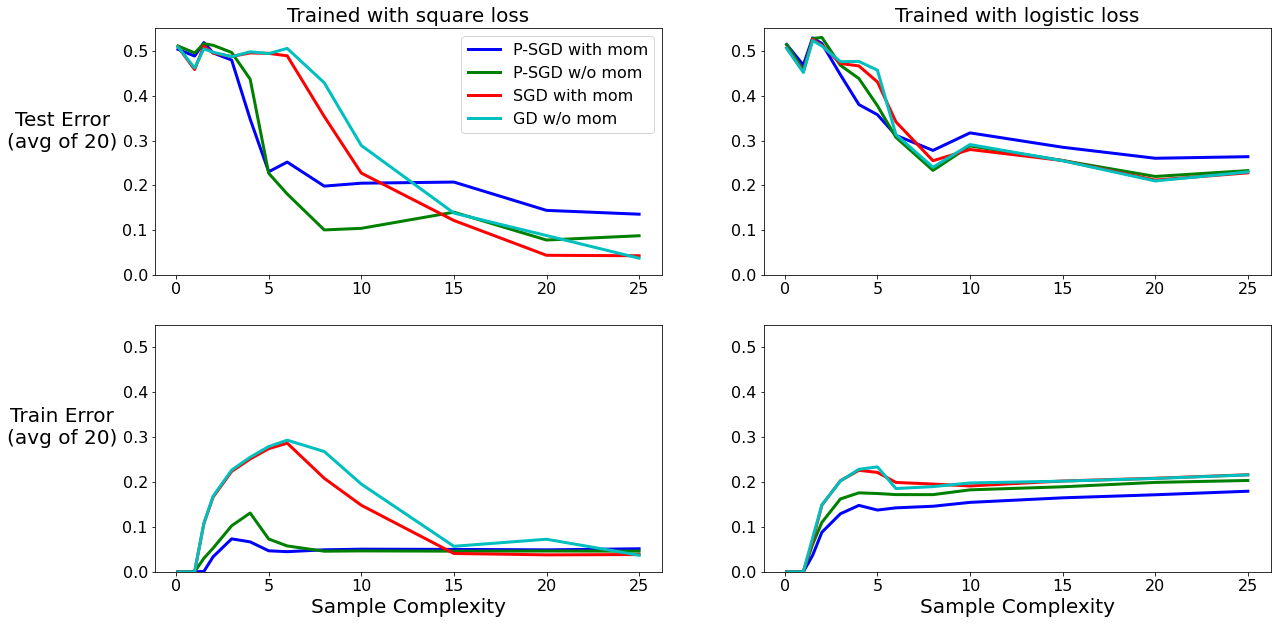

In [295]:
xs = [0.1, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 15.0, 20.0, 25.0]
indices = np.array(np.array(xs) * 2 + 0.1, dtype=int)
plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.title('Trained with square loss')
plt.plot(xs, vals_adap[('van_mom', 'p-sgd')][1, 0, indices], color=colors[0], linewidth=3, label='P-SGD with mom')
plt.plot(xs, vals_adap[('no_mom', 'p-sgd')][1, 0, indices], color=colors[1], linewidth=3, label='P-SGD w/o mom')
plt.plot(xs, vals_adap[('van_mom', 'sgd')][1, 0, indices], color=colors[2], linewidth=3, label='SGD with mom')
plt.plot(xs, vals[('no_mom', 'gd')][1, 0, indices], color=colors[3], linewidth=3, label='GD w/o mom')
# plt.plot(xs, vals[('no_mom', 'gd')][1, indices], color=colors[0], linewidth=3, label='GD')
# plt.plot(xs, vals[('nes_mom', 'p-sgd')][1, indices], color=colors[1], linewidth=3, label='Nesterov')
# plt.plot(xs, vals['mom_sgd'][2, indices, 2], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['mom_sgd'][5, indices, 2], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_sgd'][10, indices, 2], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot([], [], color='black', linewidth=3, label=r'vanilla SGD')
# plt.plot([], [], '--', color='black', linewidth=3, label=r'persistent-SGD, $\tau = 1.0$')
# plt.plot(xs, vals['mom_psgd'][1, indices, 2], '--', color=colors[0], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][2, indices, 2], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][5, indices, 2], '--', color=colors[2], linewidth=3)
plt.legend(loc='upper right')
# plt.suptitle('Symmetric Door Channel, 1024 features\nbatch_size = n_samples / 8')
# plt.xlabel('Sample Complexity')
plt.ylabel('Test Error\n(avg of 20)', rotation=0, labelpad=60)
plt.ylim(0.0, 0.55)
# plt.savefig('gd_1024_features.pdf')
# plt.show()

# plt.figure(figsize=(12, 5))
plt.subplot(222)
plt.title('Trained with logistic loss')
plt.plot(xs, vals_adap[('van_mom', 'p-sgd')][1, 1, indices], color=colors[0], linewidth=3, label='P-SGD with mom')
plt.plot(xs, vals_adap[('no_mom', 'p-sgd')][1, 1, indices], color=colors[1], linewidth=3, label='P-SGD w/o mom')
plt.plot(xs, vals_adap[('van_mom', 'sgd')][1, 1, indices], color=colors[2], linewidth=3, label='SGD with mom')
plt.plot(xs, vals[('no_mom', 'gd')][1, 1, indices], color=colors[3], linewidth=3, label='GD w/o mom')
plt.ylim(0.0, 0.55)
# plt.plot(xs, vals['no_mom_sgd'][1, indices, 2], color=colors[0], linewidth=3, label='no hidden layers')
# plt.plot(xs, vals['no_mom_sgd'][2, indices, 2], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['no_mom_sgd'][5, indices, 2], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_sgd'][10, indices, 2], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot([], [], color='black', linewidth=3, label=r'vanilla SGD')
# # plt.plot([], [], '--', color='black', linewidth=3, label=r'persistent-SGD, $\tau = 1.0$')
# plt.plot(xs, vals['no_mom_psgd'][1, indices, 2], '--', color=colors[0], linewidth=3)
# plt.plot(xs, vals['no_mom_psgd'][2, indices, 2], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['no_mom_psgd'][5, indices, 2], '--', color=colors[2], linewidth=3)
# # # plt.legend(loc='upper left')
# # plt.title('SGD, bs=32, 4000 epochs')

plt.subplot(223)
# plt.title('Square Loss')
plt.plot(xs, vals_adap[('van_mom', 'p-sgd')][0, 0, indices], color=colors[0], linewidth=3, label='P-SGD with mom')
plt.plot(xs, vals_adap[('no_mom', 'p-sgd')][0, 0, indices], color=colors[1], linewidth=3, label='P-SGD w/o mom')
plt.plot(xs, vals_adap[('van_mom', 'sgd')][0, 0, indices], color=colors[2], linewidth=3, label='SGD with mom')
plt.plot(xs, vals[('no_mom', 'gd')][0, 0, indices], color=colors[3], linewidth=3, label='GD w/o mom')
# plt.plot(xs, vals[('no_mom', 'gd')][1, indices], color=colors[0], linewidth=3, label='GD')
# plt.plot(xs, vals[('nes_mom', 'p-sgd')][1, indices], color=colors[1], linewidth=3, label='Nesterov')
# plt.plot(xs, vals['mom_sgd'][2, indices, 2], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['mom_sgd'][5, indices, 2], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_sgd'][10, indices, 2], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot([], [], color='black', linewidth=3, label=r'vanilla SGD')
# plt.plot([], [], '--', color='black', linewidth=3, label=r'persistent-SGD, $\tau = 1.0$')
# plt.plot(xs, vals['mom_psgd'][1, indices, 2], '--', color=colors[0], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][2, indices, 2], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][5, indices, 2], '--', color=colors[2], linewidth=3)
# plt.legend(loc='lower left')
# plt.suptitle('Symmetric Door Channel, 1024 features')
plt.xlabel('Sample Complexity')
plt.ylabel('Train Error\n(avg of 20)', rotation=0, labelpad=60)
plt.ylim(0.0, 0.55)
# plt.savefig('gd_1024_features.pdf')
# plt.show()

# plt.figure(figsize=(12, 5))
plt.subplot(224)
# plt.title('Logistic Loss')
plt.plot(xs, vals_adap[('van_mom', 'p-sgd')][0, 1, indices], color=colors[0], linewidth=3, label='P-SGD with mom')
plt.plot(xs, vals_adap[('no_mom', 'p-sgd')][0, 1, indices], color=colors[1], linewidth=3, label='P-SGD w/o mom')
plt.plot(xs, vals_adap[('van_mom', 'sgd')][0, 1, indices], color=colors[2], linewidth=3, label='SGD with mom')
plt.plot(xs, vals[('no_mom', 'gd')][0, 1, indices], color=colors[3], linewidth=3, label='GD w/o mom')



plt.xlabel('Sample Complexity')
plt.ylim(0.0, 0.55)
# plt.ylabel('Sulccess ratio (20 runs)')
plt.savefig('symmetric_door_1024_no_title.pdf')
plt.show()

In [258]:
sgd_mom['train loss']
sgd_mom['test error']

860     0.26
861     0.26
862     0.26
863     0.26
864     0.26
865     0.26
866     0.26
867     0.24
868     0.26
869     0.26
3770    0.24
3771    0.22
3772    0.24
3773    0.24
3774    0.22
3775    0.24
3776    0.24
3777    0.22
3778    0.22
3779    0.22
Name: test error, dtype: float64

In [259]:
psgd_mom['test error']

1500    0.44
1501    0.30
1502    0.32
1503    0.22
1504    0.32
1505    0.32
1506    0.34
1507    0.28
1508    0.26
1509    0.22
3040    0.30
3041    0.20
3042    0.18
3043    0.28
3044    0.28
3045    0.32
3046    0.26
3047    0.26
3048    0.32
3049    0.20
Name: test error, dtype: float64

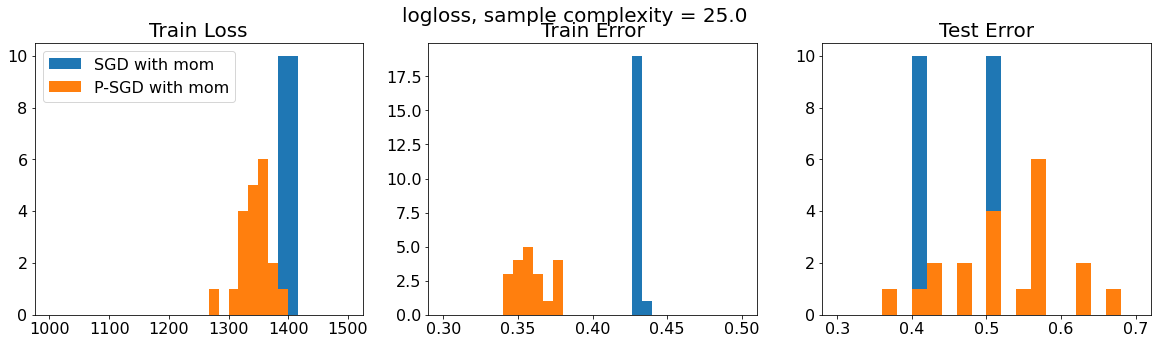

In [288]:
sc = 25.0
sgd_mom = result_adap[(result_adap['loss'] == 'logloss') & 
                    (result_adap['optim'] == 'sgd') & 
                    (result_adap['tau'] == 1.0) & 
                    (result_adap['samplecomplexity'] == sc) & 
                    (result_adap['nhidden'] == 1) &
                    (np.abs(result_adap['symmetric_door_k'] - 0.67449) < 1e-3) & 
              (result_adap['momentum'] == 0.9) & (result_adap['lr'] == 0.002)]
psgd_mom = result_adap[(result_adap['loss'] == 'logloss') & 
                    (result_adap['optim'] == 'p-sgd') & 
                    (result_adap['tau'] == 1.0) & 
                    (result_adap['samplecomplexity'] == sc) & 
                    (result_adap['nhidden'] == 1) &
                    (np.abs(result_adap['symmetric_door_k'] - 0.67449) < 1e-3) & 
              (result_adap['momentum'] == 0.9) & (result_adap['lr'] == 0.002)]
plt.figure(figsize=(20, 5))
nbins = 30
plt.subplot(131)
plt.suptitle('logloss, sample complexity = 25.0')
plt.title('Train Loss')
plt.hist(sgd_mom['train loss'], bins=nbins, range=(1000, 1500), label='SGD with mom')
plt.hist(psgd_mom['train loss'], bins=nbins, range=(1000, 1500), label='P-SGD with mom')
plt.legend(loc='upper left')
plt.subplot(132)
plt.title('Train Error')
plt.hist(sgd_mom['train error'], bins=nbins, range=(0.3, 0.5))
plt.hist(psgd_mom['train error'], bins=nbins, range=(0.3, 0.5))
plt.subplot(133)
plt.title('Test Error')
plt.hist(sgd_mom['test error'], bins=20, range=(0.3, 0.7))
plt.hist(psgd_mom['test error'], bins=20, range=(0.3, 0.7))
plt.savefig('logloss_sgd_vs_psgd_with_mom.pdf')
plt.show()

# Phase Retrieval

In [229]:
result_phase = pd.read_csv('phase_retr_adap_1024.csv')
van_momentum = ((result_phase['momentum'] == 0.9) & 
            (result_phase['lr'] == 0.002) & 
            (result_phase['nepochs'] == 2000) &
            (result_phase['nesterov'] == False))
no_momentum = ((result_phase['momentum'] == 0.0) & 
               (result_phase['lr'] == 0.01) & 
               (result_phase['nepochs'] == 2000))
result_all_phase = {}
for nhidden in [1]:
    for sc in [0.1, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 8.0, 10.0, 15.0, 20.0, 25.0]:
        for tau in [1.0]:
            for k in [0.67449]:
                for optim in ['gd', 'sgd', 'p-sgd']:
                    for loss in ['mse']:
                        cur_result = result_phase[(result_phase['loss'] == loss) & 
                                            (result_phase['optim'] == optim) & 
                                            (result_phase['tau'] == tau) & 
                                            (result_phase['samplecomplexity'] == sc) & 
                                            (result_phase['nhidden'] == nhidden) &
                                            (np.abs(result_phase['symmetric_door_k'] - k) < 1e-3)]
                        for dataset in ['train', 'test']:
                            result_all_phase[(dataset,
                                        'van_mom',
                                        loss,
                                        optim, 
                                        nhidden, 
                                        sc, 
                                        tau, 
                                        k)] = np.mean(np.clip(cur_result[van_momentum][f'{dataset} error'], 0, 5))
                            result_all_phase[(dataset,
                                        'no_mom', 
                                        loss,
                                        optim, 
                                        nhidden, 
                                        sc, 
                                        tau, 
                                        k)] = np.mean(np.clip(cur_result[no_momentum][f'{dataset} error'], 0, 5))
vals_phase = {}      
for optim_type in ['van_mom', 'nes_mom', 'no_mom']:
    for optim in ['gd', 'sgd', 'p-sgd']:
        vals_phase[(optim_type, optim)] = np.zeros((2, 100))
for (dataset, optim_type, loss, optim, _, sc, _, _), value in result_all_phase.items():
#     print(int(dataset == 'test'), sc)
#     print(vals[(optim_type, optim)][dataset == 'test', 3])
    vals_phase[(optim_type, optim)][int(dataset == 'test'), int(2 * sc + 0.1)] = value

<ipython-input-229-71ec333bf6d9>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(np.clip(cur_result[van_momentum][f'{dataset} error'], 0, 5))
<ipython-input-229-71ec333bf6d9>:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(np.clip(cur_result[no_momentum][f'{dataset} error'], 0, 5))
<ipython-input-229-71ec333bf6d9>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(np.clip(cur_result[van_momentum][f'{dataset} error'], 0, 5))
<ipython-input-229-71ec333bf6d9>:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(np.clip(cur_result[no_momentum][f'{dataset} error'], 0, 5))
<ipython-input-229-71ec333bf6d9>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(np.clip(cur_result[van_momentum][f'{dataset} error'], 0, 5))
<ipython-input-229-71ec333bf6d9>:38: UserWarning: Bo

<ipython-input-229-71ec333bf6d9>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(np.clip(cur_result[van_momentum][f'{dataset} error'], 0, 5))
<ipython-input-229-71ec333bf6d9>:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(np.clip(cur_result[no_momentum][f'{dataset} error'], 0, 5))
<ipython-input-229-71ec333bf6d9>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(np.clip(cur_result[van_momentum][f'{dataset} error'], 0, 5))
<ipython-input-229-71ec333bf6d9>:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(np.clip(cur_result[no_momentum][f'{dataset} error'], 0, 5))
<ipython-input-229-71ec333bf6d9>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(np.clip(cur_result[van_momentum][f'{dataset} error'], 0, 5))
<ipython-input-229-71ec333bf6d9>:38: UserWarning: Bo

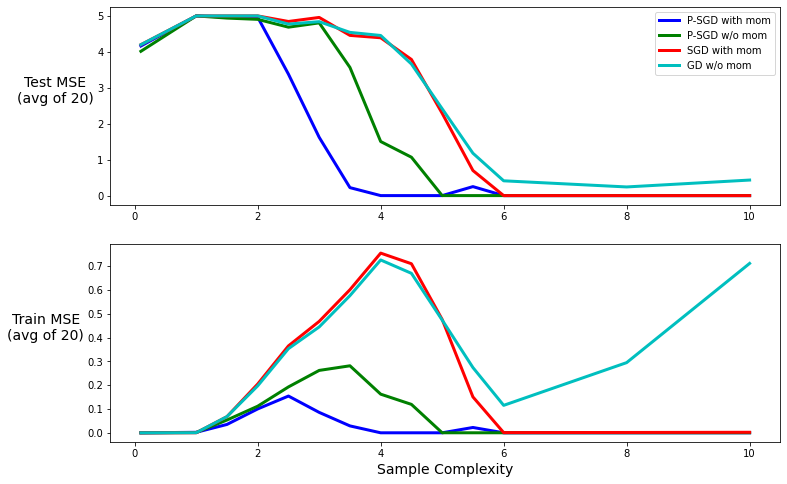

In [302]:
xs = [0.1, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 8.0, 10.0, 15.0, 20.0, 25.0]
indices = np.array(np.array(xs) * 2 + 0.1, dtype=int)
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(xs, vals_phase[('van_mom', 'p-sgd')][1, indices], color=colors[0], linewidth=3, label='P-SGD with mom')
plt.plot(xs, vals_phase[('no_mom', 'p-sgd')][1, indices], color=colors[1], linewidth=3, label='P-SGD w/o mom')
plt.plot(xs, vals_phase[('van_mom', 'sgd')][1, indices], color=colors[2], linewidth=3, label='SGD with mom')
plt.plot(xs, vals_phase[('no_mom', 'gd')][1, indices], color=colors[3], linewidth=3, label='GD w/o mom')
# plt.plot(xs, vals[('no_mom', 'gd')][1, indices], color=colors[0], linewidth=3, label='GD')
# plt.plot(xs, vals[('nes_mom', 'p-sgd')][1, indices], color=colors[1], linewidth=3, label='Nesterov')
# plt.plot(xs, vals['mom_sgd'][2, indices, 2], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['mom_sgd'][5, indices, 2], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_sgd'][10, indices, 2], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot([], [], color='black', linewidth=3, label=r'vanilla SGD')
# plt.plot([], [], '--', color='black', linewidth=3, label=r'persistent-SGD, $\tau = 1.0$')
# plt.plot(xs, vals['mom_psgd'][1, indices, 2], '--', color=colors[0], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][2, indices, 2], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][5, indices, 2], '--', color=colors[2], linewidth=3)
plt.legend(loc='upper right')
# plt.suptitle('Phase Retrieval, 1024 features\nbatch_size = n_samples / 8')
# plt.xlabel('Sample Complexity')
plt.ylabel('Test MSE\n(avg of 20)', rotation=0, labelpad=42)
# plt.ylim(0.0, 0.001)
# plt.savefig('gd_1024_features.pdf')
# plt.show()

# plt.figure(figsize=(12, 5))
plt.subplot(212)
plt.plot(xs, vals_phase[('van_mom', 'p-sgd')][0, indices], color=colors[0], linewidth=3, label='P-SGD with mom')
plt.plot(xs, vals_phase[('no_mom', 'p-sgd')][0, indices], color=colors[1], linewidth=3, label='P-SGD w/o mom')
plt.plot(xs, vals_phase[('van_mom', 'sgd')][0, indices], color=colors[2], linewidth=3, label='SGD with mom')
plt.plot(xs, vals_phase[('no_mom', 'gd')][0, indices], color=colors[3], linewidth=3, label='GD w/o mom')
# plt.ylim(0.0, 0.55)
# plt.plot(xs, vals['no_mom_sgd'][1, indices, 2], color=colors[0], linewidth=3, label='no hidden layers')
# plt.plot(xs, vals['no_mom_sgd'][2, indices, 2], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['no_mom_sgd'][5, indices, 2], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_sgd'][10, indices, 2], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot([], [], color='black', linewidth=3, label=r'vanilla SGD')
# # plt.plot([], [], '--', color='black', linewidth=3, label=r'persistent-SGD, $\tau = 1.0$')
# plt.plot(xs, vals['no_mom_psgd'][1, indices, 2], '--', color=colors[0], linewidth=3)
# plt.plot(xs, vals['no_mom_psgd'][2, indices, 2], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['no_mom_psgd'][5, indices, 2], '--', color=colors[2], linewidth=3)
# # # plt.legend(loc='upper left')
# # plt.title('SGD, bs=32, 4000 epochs')
plt.ylabel('Train MSE\n(avg of 20)', rotation=0, labelpad=42)
plt.xlabel('Sample Complexity')
# plt.ylim(0.0, 0.001)
# plt.ylabel('Sulccess ratio (20 runs)')
plt.savefig('phase_retrieval_1024_no_title.pdf')
plt.show()

# Phase Retrieval with Projection

In [339]:
result_proj = pd.read_csv('phase_retr_proj_1024.csv')
result_proj = result_proj[result_proj['project_on_sphere'] == True]
van_momentum = ((result_proj['momentum'] == 0.9) & 
            (result_proj['lr'] == 0.005) & 
            (result_proj['nepochs'] == 10000) &
            (result_proj['nesterov'] == True))
no_momentum = ((result_proj['momentum'] == 0.0) & 
               (result_proj['lr'] == 0.01) & 
               (result_proj['nepochs'] == 10000))
result_all_proj = {}
for nhidden in [1]:
    for sc in [0.5, 1. , 2. , 2.5, 3. , 3.5, 4. , 5. , 6. , 7. ]:
        for tau in [2.0]:
            for k in [0.67449]:
                for optim in ['gd', 'sgd', 'p-sgd']:
                    for loss in ['mse']:
                        cur_result = result_proj[(result_proj['loss'] == loss) & 
                                            (result_proj['optim'] == optim) & 
                                            (result_proj['tau'] == tau) & 
                                            (result_proj['samplecomplexity'] == sc) & 
                                            (result_proj['nhidden'] == nhidden) &
                                            (np.abs(result_proj['symmetric_door_k'] - k) < 1e-3)]
                        result_all_proj[('van_mom',
                                    optim, 
                                    nhidden, 
                                    sc, 
                                    tau, 
                                    k)] = np.mean(cur_result[van_momentum][f'test error'] < 1e-3) 
                        result_all_proj[(
                                    'no_mom',
                                    optim, 
                                    nhidden, 
                                    sc, 
                                    tau, 
                                    k)] = np.mean(cur_result[no_momentum][f'test error'] < 1e-3) 
vals_proj = {}      
for optim_type in ['van_mom', 'nes_mom', 'no_mom']:
    for optim in ['gd', 'sgd', 'p-sgd']:
            vals_proj[(optim_type, optim)] = np.zeros(100)
for (optim_type, optim, _, sc, _, _), value in result_all_proj.items():
#     print(int(dataset == 'test'), sc)
#     print(vals[(optim_type, optim)][dataset == 'test', 3])
    vals_proj[(optim_type, optim)][int(2 * sc + 0.1)] = value

<ipython-input-339-804d45651f00>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[van_momentum][f'test error'] < 1e-3)
<ipython-input-339-804d45651f00>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'test error'] < 1e-3)
<ipython-input-339-804d45651f00>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[van_momentum][f'test error'] < 1e-3)
<ipython-input-339-804d45651f00>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'test error'] < 1e-3)
<ipython-input-339-804d45651f00>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[van_momentum][f'test error'] < 1e-3)
<ipython-input-339-804d45651f00>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)

In [353]:
vals_proj[('van_mom', 'sgd')]

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , nan, 0. , 0. , 0.8, 0. , 1. ,
       0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

In [360]:
np.unique(result_proj['samplecomplexity'])

array([0.5, 1. , 1.4, 1.5, 1.6, 1.7, 1.8, 2. , 2.5, 3. , 3.5, 4. , 5. ,
       6. , 7. ])

In [364]:
xs_psgd_mom = [0.5, 1. , 1.4, 1.5, 1.6, 1.7, 1.8, 2. , 2.5, 3. , 3.5, 4. , 5. ,6. , 7. ]
ys_psgd_mom = [0, 0, 0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

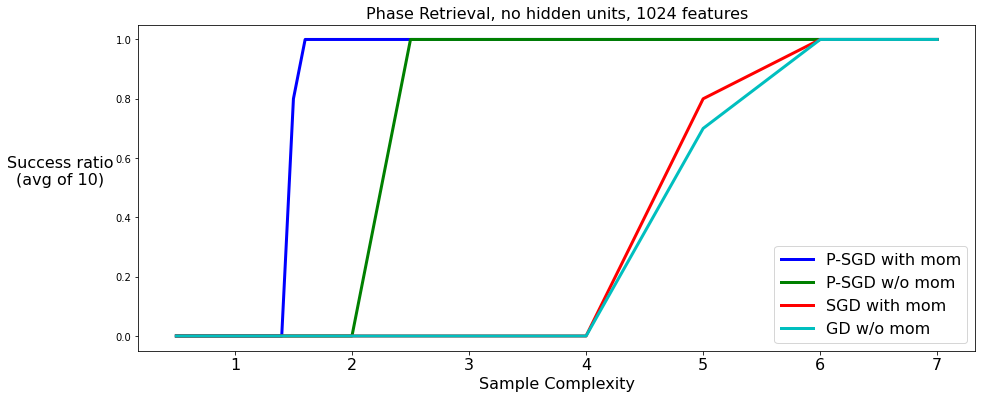

In [379]:
xs = [0.5, 1. , 2. , 2.5, 3. , 3.5, 4. , 5. , 6. , 7. ]
indices = np.array(np.array(xs) * 2 + 0.1, dtype=int)
plt.figure(figsize=(15, 6))
plt.plot(xs_psgd_mom, ys_psgd_mom, color=colors[0], linewidth=3, label='P-SGD with mom')
plt.plot(xs, vals_proj[('no_mom', 'p-sgd')][indices], color=colors[1], linewidth=3, label='P-SGD w/o mom')
plt.plot(xs, vals_proj[('van_mom', 'sgd')][indices], color=colors[2], linewidth=3, label='SGD with mom')
plt.plot(xs, vals_proj[('no_mom', 'gd')][indices], color=colors[3], linewidth=3, label='GD w/o mom')
# plt.plot(xs, vals[('no_mom', 'gd')][1, indices], color=colors[0], linewidth=3, label='GD')
# plt.plot(xs, vals[('nes_mom', 'p-sgd')][1, indices], color=colors[1], linewidth=3, label='Nesterov')
# plt.plot(xs, vals['mom_sgd'][2, indices, 2], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['mom_sgd'][5, indices, 2], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_sgd'][10, indices, 2], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot([], [], color='black', linewidth=3, label=r'vanilla SGD')
# plt.plot([], [], '--', color='black', linewidth=3, label=r'persistent-SGD, $\tau = 1.0$')
# plt.plot(xs, vals['mom_psgd'][1, indices, 2], '--', color=colors[0], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][2, indices, 2], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][5, indices, 2], '--', color=colors[2], linewidth=3)
plt.legend(loc='lower right')
# plt.suptitle('Phase Retrieval, 1024 features\nbatch_size = n_samples / 8')
# plt.xlabel('Sample Complexity')
plt.ylabel('Success ratio\n(avg of 10)', rotation=0, labelpad=55)
# plt.ylim(0.0, 0.001)
# plt.savefig('gd_1024_features.pdf')
# plt.show()

# plt.figure(figsize=(12, 5))
# plt.ylim(0.0, 0.55)
# plt.plot(xs, vals['no_mom_sgd'][1, indices, 2], color=colors[0], linewidth=3, label='no hidden layers')
# plt.plot(xs, vals['no_mom_sgd'][2, indices, 2], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['no_mom_sgd'][5, indices, 2], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_sgd'][10, indices, 2], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot([], [], color='black', linewidth=3, label=r'vanilla SGD')
# # plt.plot([], [], '--', color='black', linewidth=3, label=r'persistent-SGD, $\tau = 1.0$')
# plt.plot(xs, vals['no_mom_psgd'][1, indices, 2], '--', color=colors[0], linewidth=3)
# plt.plot(xs, vals['no_mom_psgd'][2, indices, 2], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['no_mom_psgd'][5, indices, 2], '--', color=colors[2], linewidth=3)
# # # plt.legend(loc='upper left')
plt.title('Phase Retrieval, no hidden units, 1024 features')
# plt.ylabel('Train MSE\n(avg of 20)', rotation=0, labelpad=42)
plt.xlabel('Sample Complexity')
# plt.ylim(0.0, 0.001)
# plt.ylabel('Sulccess ratio (20 runs)')
plt.savefig('phase_retrieval_1024_psgd.pdf')
plt.show()

# Symmetric Door with Projection

In [108]:
result = pd.read_csv('agg_results/symm_door_new.csv')
nes_momentum = ((result['momentum'] == 0.9) & 
            (result['lr'] == 0.005) & 
            (result['nepochs'] == 2000) &
            (result['nesterov'] == True))
no_momentum = ((result['momentum'] == 0.0) & 
               (result['lr'] == 0.01) & 
               (result['nepochs'] == 2000))
result_all = {}
for nhidden in [1]:
    for sc in [0.1, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 12.0, 15.0, 20.0]:
        for tau in [2.0]:
            for k in [0.67449]:
                for optim in ['gd', 'sgd', 'p-sgd']:
                    for loss in ['logloss', 'square']:
                        cur_result = result[(result['loss'] == loss) & 
                                            (result['optim'] == optim) & 
                                            (result['tau'] == tau) & 
                                            (result['samplecomplexity'] == sc) & 
                                            (result['nhidden'] == nhidden) &
                                            (np.abs(result['symmetric_door_k'] - k) < 1e-3)]
                        #TODO!!!!!
                        for dataset in ['train', 'test']:
                            result_all[(dataset,
                                        'nes_mom', 
                                        loss,
                                        optim, 
                                        nhidden, 
                                        sc, 
                                        tau, 
                                        k)] = np.mean(cur_result[nes_momentum][f'{dataset} error']) / 2
                            result_all[(dataset,
                                        'no_mom', 
                                        loss,
                                        optim, 
                                        nhidden, 
                                        sc, 
                                        tau, 
                                        k)] = np.mean(cur_result[no_momentum][f'{dataset} error']) / 2
vals = {}      
for optim_type in ['nes_mom', 'no_mom']:
    for optim in ['gd', 'sgd', 'p-sgd']:
        for loss in ['logloss', 'square']:
            vals[(optim_type, optim)] = np.zeros((2, 2, 100))
for (dataset, optim_type, loss, optim, _, sc, _, _), value in result_all.items():
#     print(int(dataset == 'test'), sc)
#     print(vals[(optim_type, optim)][dataset == 'test', 3])
    vals[(optim_type, optim)][int(dataset == 'test'), int(loss == 'logloss'), int(2 * sc + 0.1)] = value

<ipython-input-108-36c0dc6213fe>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset} error']) / 2
<ipython-input-108-36c0dc6213fe>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset} error']) / 2
<ipython-input-108-36c0dc6213fe>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset} error']) / 2
<ipython-input-108-36c0dc6213fe>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset} error']) / 2
<ipython-input-108-36c0dc6213fe>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset} error']) / 2
<ipython-input-108-36c0dc6213fe>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame i

<ipython-input-108-36c0dc6213fe>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset} error']) / 2
<ipython-input-108-36c0dc6213fe>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset} error']) / 2
<ipython-input-108-36c0dc6213fe>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset} error']) / 2
<ipython-input-108-36c0dc6213fe>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset} error']) / 2
<ipython-input-108-36c0dc6213fe>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset} error']) / 2
<ipython-input-108-36c0dc6213fe>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame i

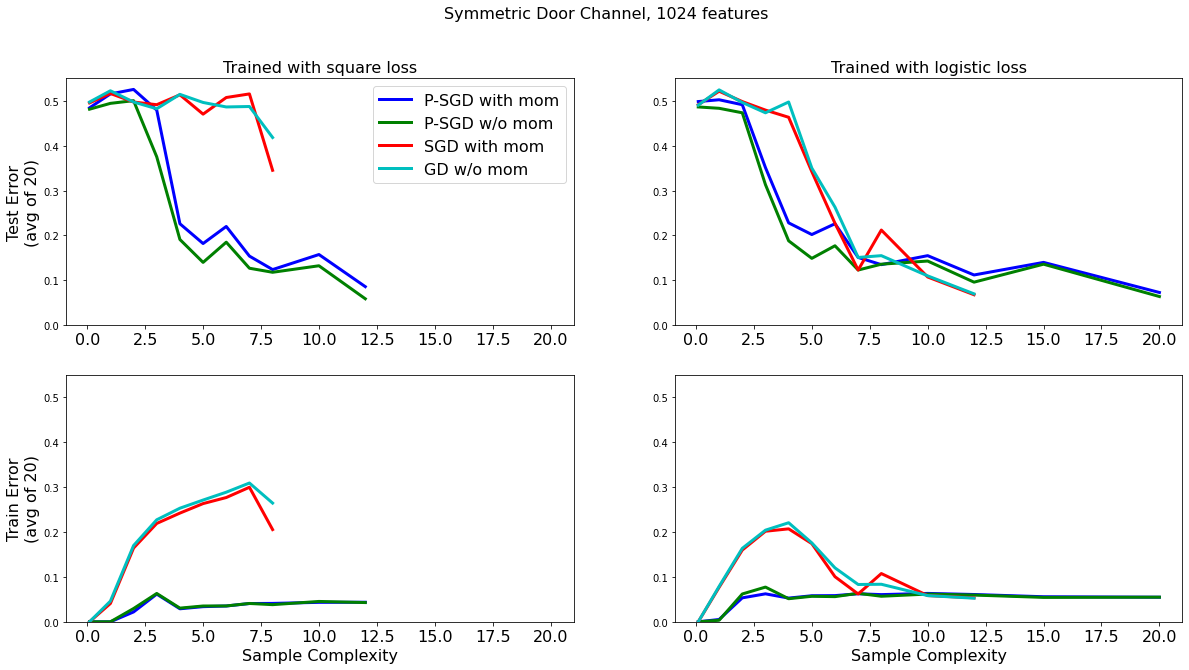

In [391]:
xs = [0.1, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 12.0, 15.0, 20.0]
indices = np.array(np.array(xs) * 2 + 0.1, 
                   dtype=int)
plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.title('Trained with square loss')
plt.plot(xs, vals[('nes_mom', 'p-sgd')][1, 0, indices], color=colors[0], linewidth=3, label='P-SGD with mom')
plt.plot(xs, vals[('no_mom', 'p-sgd')][1, 0, indices], color=colors[1], linewidth=3, label='P-SGD w/o mom')
plt.plot(xs, vals[('nes_mom', 'sgd')][1, 0, indices], color=colors[2], linewidth=3, label='SGD with mom')
plt.plot(xs, vals[('no_mom', 'gd')][1, 0, indices], color=colors[3], linewidth=3, label='GD w/o mom')
# plt.plot(xs, vals[('no_mom', 'gd')][1, indices], color=colors[0], linewidth=3, label='GD')
# plt.plot(xs, vals[('nes_mom', 'p-sgd')][1, indices], color=colors[1], linewidth=3, label='Nesterov')
# plt.plot(xs, vals['mom_sgd'][2, indices, 2], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['mom_sgd'][5, indices, 2], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_sgd'][10, indices, 2], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot([], [], color='black', linewidth=3, label=r'vanilla SGD')
# plt.plot([], [], '--', color='black', linewidth=3, label=r'persistent-SGD, $\tau = 1.0$')
# plt.plot(xs, vals['mom_psgd'][1, indices, 2], '--', color=colors[0], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][2, indices, 2], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][5, indices, 2], '--', color=colors[2], linewidth=3)
plt.legend(loc='upper right')
plt.suptitle('Symmetric Door Channel, 1024 features')
# plt.xlabel('Sample Complexity')
plt.ylabel('Test Error\n(avg of 20)')
plt.ylim(0.0, 0.55)
# plt.savefig('gd_1024_features.pdf')
# plt.show()

# plt.figure(figsize=(12, 5))
plt.subplot(222)
plt.title('Trained with logistic loss')
plt.plot(xs, vals[('nes_mom', 'p-sgd')][1, 1, indices], color=colors[0], linewidth=3, label='P-SGD with mom')
plt.plot(xs, vals[('no_mom', 'p-sgd')][1, 1, indices], color=colors[1], linewidth=3, label='P-SGD w/o mom')
plt.plot(xs, vals[('nes_mom', 'sgd')][1, 1, indices], color=colors[2], linewidth=3, label='SGD with mom')
plt.plot(xs, vals[('no_mom', 'gd')][1, 1, indices], color=colors[3], linewidth=3, label='GD w/o mom')
plt.ylim(0.0, 0.55)
# plt.plot(xs, vals['no_mom_sgd'][1, indices, 2], color=colors[0], linewidth=3, label='no hidden layers')
# plt.plot(xs, vals['no_mom_sgd'][2, indices, 2], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['no_mom_sgd'][5, indices, 2], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_sgd'][10, indices, 2], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot([], [], color='black', linewidth=3, label=r'vanilla SGD')
# # plt.plot([], [], '--', color='black', linewidth=3, label=r'persistent-SGD, $\tau = 1.0$')
# plt.plot(xs, vals['no_mom_psgd'][1, indices, 2], '--', color=colors[0], linewidth=3)
# plt.plot(xs, vals['no_mom_psgd'][2, indices, 2], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['no_mom_psgd'][5, indices, 2], '--', color=colors[2], linewidth=3)
# # # plt.legend(loc='upper left')
# # plt.title('SGD, bs=32, 4000 epochs')

plt.subplot(223)
# plt.title('Square Loss')
plt.plot(xs, vals[('nes_mom', 'p-sgd')][0, 0, indices], color=colors[0], linewidth=3, label='P-SGD with mom')
plt.plot(xs, vals[('no_mom', 'p-sgd')][0, 0, indices], color=colors[1], linewidth=3, label='P-SGD w/o mom')
plt.plot(xs, vals[('nes_mom', 'sgd')][0, 0, indices], color=colors[2], linewidth=3, label='SGD with mom')
plt.plot(xs, vals[('no_mom', 'gd')][0, 0, indices], color=colors[3], linewidth=3, label='GD w/o mom')
# plt.plot(xs, vals[('no_mom', 'gd')][1, indices], color=colors[0], linewidth=3, label='GD')
# plt.plot(xs, vals[('nes_mom', 'p-sgd')][1, indices], color=colors[1], linewidth=3, label='Nesterov')
# plt.plot(xs, vals['mom_sgd'][2, indices, 2], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['mom_sgd'][5, indices, 2], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_sgd'][10, indices, 2], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot([], [], color='black', linewidth=3, label=r'vanilla SGD')
# plt.plot([], [], '--', color='black', linewidth=3, label=r'persistent-SGD, $\tau = 1.0$')
# plt.plot(xs, vals['mom_psgd'][1, indices, 2], '--', color=colors[0], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][2, indices, 2], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][5, indices, 2], '--', color=colors[2], linewidth=3)
# plt.legend(loc='lower left')
# plt.suptitle('Symmetric Door Channel, 1024 features')
plt.xlabel('Sample Complexity')
plt.ylabel('Train Error\n(avg of 20)')
plt.ylim(0.0, 0.55)
# plt.savefig('gd_1024_features.pdf')
# plt.show()

# plt.figure(figsize=(12, 5))
plt.subplot(224)
# plt.title('Logistic Loss')
plt.plot(xs, vals[('nes_mom', 'p-sgd')][0, 1, indices], color=colors[0], linewidth=3, label='P-SGD with mom')
plt.plot(xs, vals[('no_mom', 'p-sgd')][0, 1, indices], color=colors[1], linewidth=3, label='P-SGD w/o mom')
plt.plot(xs, vals[('nes_mom', 'sgd')][0, 1, indices], color=colors[2], linewidth=3, label='SGD with mom')
plt.plot(xs, vals[('no_mom', 'gd')][0, 1, indices], color=colors[3], linewidth=3, label='GD w/o mom')



plt.xlabel('Sample Complexity')
plt.ylim(0.0, 0.55)
# plt.ylabel('Sulccess ratio (20 runs)')
# plt.savefig('symmetric_door_1024.pdf')
plt.show()

# 17.05 Phase Retrieval with Projection, multiple hidden units

In [6]:
result = pd.read_csv('agg_results/15_05_phase_retr.csv')
sample_complexities = np.unique(result['samplecomplexity'])
nes_momentum = ((result['momentum'] == 0.9) & 
            (result['lr'] == 0.005) & 
            (result['n_epochs'] == 2000) &
            (result['nesterov'] == True))
no_momentum = ((result['momentum'] == 0.0) & 
               (result['lr'] == 0.005) & 
               (result['n_epochs'] == 2000))
result_all = {}
for nhidden in [2, 5, 10]:
    for sc in sample_complexities:
        for tau in [2.0]:
            for k in [0.67449]:
                for optim in ['gd', 'sgd', 'p-sgd']:
                    for loss in ['mse']:
                        cur_result = result[(result['loss'] == loss) & 
                                            (result['optim'] == optim) & 
                                            (result['tau'] == tau) & 
                                            (result['samplecomplexity'] == sc) & 
                                            (result['nhidden'] == nhidden) &
                                            (np.abs(result['symmetric_door_k'] - k) < 1e-3)]
                        for dataset in ['train', 'test']:
                            result_all[(dataset,
                                        'nes_mom', 
                                        loss,
                                        optim, 
                                        nhidden, 
                                        sc, 
                                        tau, 
                                        k)] = np.mean(cur_result[nes_momentum][f'{dataset}_error']) / 2
                            result_all[(dataset,
                                        'no_mom', 
                                        loss,
                                        optim, 
                                        nhidden, 
                                        sc, 
                                        tau, 
                                        k)] = np.mean(cur_result[no_momentum][f'{dataset}_error']) / 2
vals = {}      
for optim_type in ['nes_mom', 'no_mom']:
    for optim in ['gd', 'sgd', 'p-sgd']:
        for nhidden in [2, 5, 10]:
            vals[(optim_type, optim, nhidden)] = np.zeros((2, 100))
for (dataset, optim_type, _, optim, nhidden, sc, _, _), value in result_all.items():
#     print(int(dataset == 'test'), sc)
#     print(vals[(optim_type, optim)][dataset == 'test', 3])
    vals[(optim_type, optim, nhidden)][int(dataset == 'test'), int(2 * sc + 0.1)] = value

<ipython-input-6-b71cad3e05cd>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset}_error']) / 2
<ipython-input-6-b71cad3e05cd>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset}_error']) / 2
<ipython-input-6-b71cad3e05cd>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset}_error']) / 2
<ipython-input-6-b71cad3e05cd>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset}_error']) / 2
<ipython-input-6-b71cad3e05cd>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset}_error']) / 2
<ipython-input-6-b71cad3e05cd>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] 

<ipython-input-6-b71cad3e05cd>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset}_error']) / 2
<ipython-input-6-b71cad3e05cd>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset}_error']) / 2
<ipython-input-6-b71cad3e05cd>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset}_error']) / 2
<ipython-input-6-b71cad3e05cd>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset}_error']) / 2
<ipython-input-6-b71cad3e05cd>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset}_error']) / 2
<ipython-input-6-b71cad3e05cd>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] =

<ipython-input-6-b71cad3e05cd>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset}_error']) / 2
<ipython-input-6-b71cad3e05cd>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset}_error']) / 2
<ipython-input-6-b71cad3e05cd>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset}_error']) / 2
<ipython-input-6-b71cad3e05cd>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset}_error']) / 2
<ipython-input-6-b71cad3e05cd>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset}_error']) / 2
<ipython-input-6-b71cad3e05cd>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] 

<ipython-input-6-b71cad3e05cd>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset}_error']) / 2


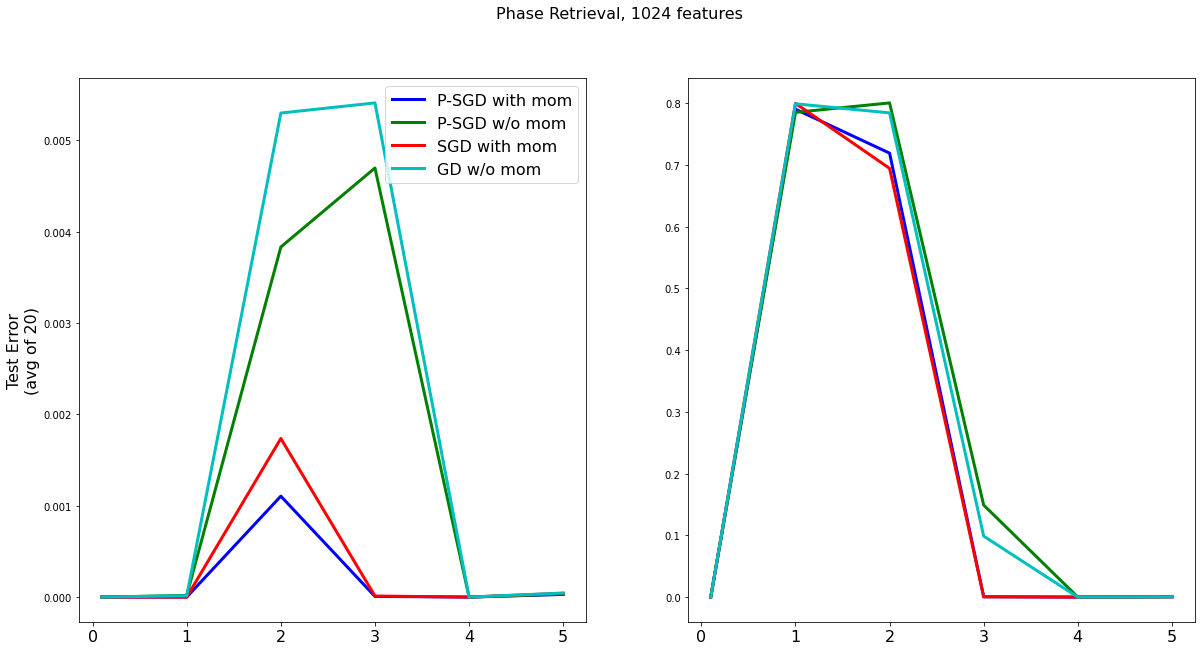

In [90]:
xs = [0.1, 1.0, 2.0, 3.0, 4.0, 5.0]
indices = np.array(np.array(xs) * 2 + 0.1, 
                   dtype=int)
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.plot(xs, vals[('nes_mom', 'p-sgd', 2)][0, indices], color=colors[0], linewidth=3, label='P-SGD with mom')
plt.plot(xs, vals[('no_mom', 'p-sgd', 2)][0, indices], color=colors[1], linewidth=3, label='P-SGD w/o mom')
plt.plot(xs, vals[('nes_mom', 'sgd', 2)][0, indices], color=colors[2], linewidth=3, label='SGD with mom')
plt.plot(xs, vals[('no_mom', 'gd', 2)][0, indices], color=colors[3], linewidth=3, label='GD w/o mom')
# plt.plot(xs, vals[('no_mom', 'gd')][1, indices], color=colors[0], linewidth=3, label='GD')
# plt.plot(xs, vals[('nes_mom', 'p-sgd')][1, indices], color=colors[1], linewidth=3, label='Nesterov')
# plt.plot(xs, vals['mom_sgd'][2, indices, 2], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['mom_sgd'][5, indices, 2], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_sgd'][10, indices, 2], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot([], [], color='black', linewidth=3, label=r'vanilla SGD')
# plt.plot([], [], '--', color='black', linewidth=3, label=r'persistent-SGD, $\tau = 1.0$')
# plt.plot(xs, vals['mom_psgd'][1, indices, 2], '--', color=colors[0], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][2, indices, 2], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][5, indices, 2], '--', color=colors[2], linewidth=3)
plt.legend(loc='upper right')
plt.suptitle('Phase Retrieval, 1024 features')
# plt.xlabel('Sample Complexity')
plt.ylabel('Test Error\n(avg of 20)')
# plt.ylim(0.0, 0.55)
# plt.savefig('gd_1024_features.pdf')
# plt.show()

# plt.figure(figsize=(12, 5))
plt.subplot(122)
plt.plot(xs, vals[('nes_mom', 'p-sgd', 2)][1, indices], color=colors[0], linewidth=3, label='P-SGD with mom')
plt.plot(xs, vals[('no_mom', 'p-sgd', 2)][1, indices], color=colors[1], linewidth=3, label='P-SGD w/o mom')
plt.plot(xs, vals[('nes_mom', 'sgd', 2)][1, indices], color=colors[2], linewidth=3, label='SGD with mom')
plt.plot(xs, vals[('no_mom', 'gd', 2)][1, indices], color=colors[3], linewidth=3, label='GD w/o mom')
# plt.ylim(0.0, 0.55)

# plt.ylabel('Sulccess ratio (20 runs)')
# plt.savefig('symmetric_door_1024.pdf')
plt.show()

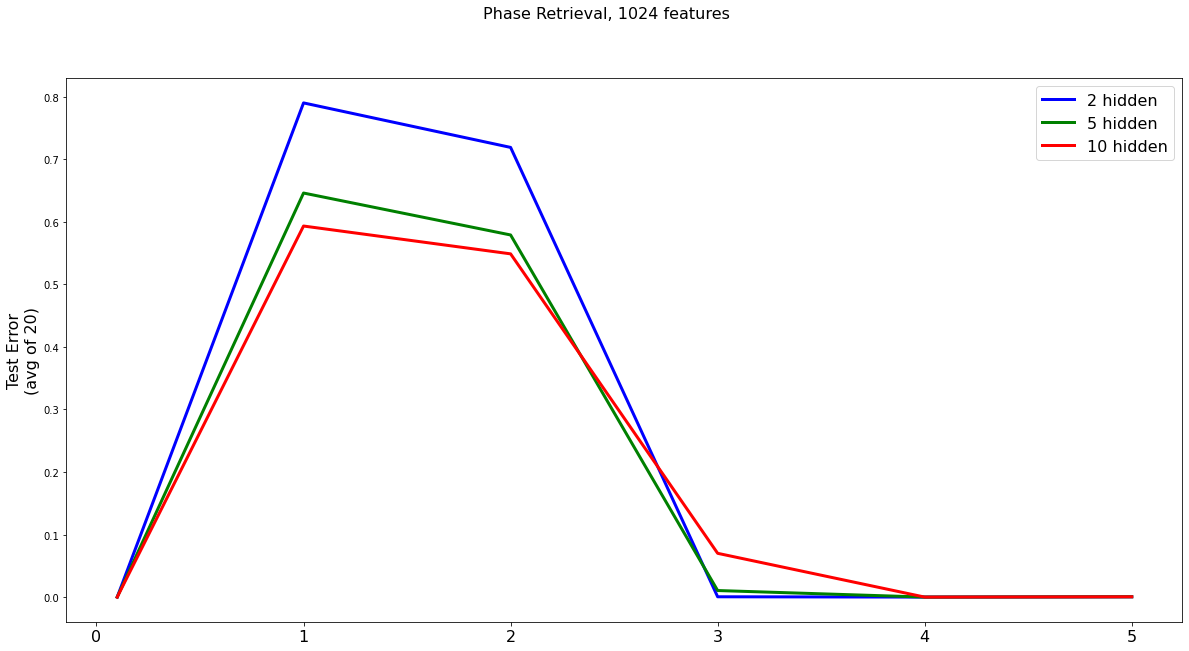

In [91]:
xs = [0.1, 1.0, 2.0, 3.0, 4.0, 5.0]
indices = np.array(np.array(xs) * 2 + 0.1, 
                   dtype=int)
plt.figure(figsize=(20, 10))
plt.plot(xs, vals[('nes_mom', 'p-sgd', 2)][1, indices], color=colors[0], linewidth=3, label='2 hidden')
plt.plot(xs, vals[('nes_mom', 'p-sgd', 5)][1, indices], color=colors[1], linewidth=3, label='5 hidden')
plt.plot(xs, vals[('nes_mom', 'p-sgd', 10)][1, indices], color=colors[2], linewidth=3, label='10 hidden')
# plt.plot(xs, vals[('no_mom', 'p-sgd', 2)][0, indices], color=colors[1], linewidth=3, label='P-SGD w/o mom')
# plt.plot(xs, vals[('nes_mom', 'sgd', 2)][0, indices], color=colors[2], linewidth=3, label='SGD with mom')
# plt.plot(xs, vals[('no_mom', 'gd', 2)][0, indices], color=colors[3], linewidth=3, label='GD w/o mom')
# plt.plot(xs, vals[('no_mom', 'gd')][1, indices], color=colors[0], linewidth=3, label='GD')
# plt.plot(xs, vals[('nes_mom', 'p-sgd')][1, indices], color=colors[1], linewidth=3, label='Nesterov')
# plt.plot(xs, vals['mom_sgd'][2, indices, 2], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['mom_sgd'][5, indices, 2], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_sgd'][10, indices, 2], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot([], [], color='black', linewidth=3, label=r'vanilla SGD')
# plt.plot([], [], '--', color='black', linewidth=3, label=r'persistent-SGD, $\tau = 1.0$')
# plt.plot(xs, vals['mom_psgd'][1, indices, 2], '--', color=colors[0], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][2, indices, 2], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][5, indices, 2], '--', color=colors[2], linewidth=3)
plt.legend(loc='upper right')
plt.suptitle('Phase Retrieval, 1024 features')
# plt.xlabel('Sample Complexity')
plt.ylabel('Test Error\n(avg of 20)')
# plt.ylim(0.0, 0.55)
# plt.savefig('gd_1024_features.pdf')
# plt.show()

# plt.figure(figsize=(12, 5))
# plt.subplot(122)
# plt.plot(xs, vals[('nes_mom', 'p-sgd', 2)][1, indices], color=colors[0], linewidth=3, label='P-SGD with mom')
# plt.plot(xs, vals[('no_mom', 'p-sgd', 2)][1, indices], color=colors[1], linewidth=3, label='P-SGD w/o mom')
# plt.plot(xs, vals[('nes_mom', 'sgd', 2)][1, indices], color=colors[2], linewidth=3, label='SGD with mom')
# plt.plot(xs, vals[('no_mom', 'gd', 2)][1, indices], color=colors[3], linewidth=3, label='GD w/o mom')
# plt.ylim(0.0, 0.55)

# plt.ylabel('Sulccess ratio (20 runs)')
# plt.savefig('symmetric_door_1024.pdf')
plt.show()

# 17_05 Symmetric door, projection, multiple hidden units

In [92]:
result = pd.read_csv('agg_results/18_05_symm_door.csv')

In [109]:
result = pd.read_csv('agg_results/18_05_symm_door.csv')
sample_complexities = np.unique(result['samplecomplexity'])
nes_momentum = ((result['momentum'] == 0.9) & 
            (result['lr'] == 0.005) & 
            (result['n_epochs'] == 1000) &
            (result['nesterov'] == True))
no_momentum = ((result['momentum'] == 0.0) & 
               (result['lr'] == 0.005) & 
               (result['n_epochs'] == 1000))
result_all = {}
for nhidden in [2, 5, 10]:
    for sc in sample_complexities:
        for tau in [2.0]:
            for k in [0.67449]:
                for optim in ['gd', 'sgd', 'p-sgd']:
                    for loss in ['logloss']:
                        cur_result = result[(result['loss'] == loss) & 
                                            (result['optim'] == optim) & 
                                            (result['tau'] == tau) & 
                                            (result['samplecomplexity'] == sc) & 
                                            (result['nhidden'] == nhidden) &
                                            (np.abs(result['symmetric_door_k'] - k) < 1e-3)]
                        for dataset in ['train', 'test']:
                            result_all[(dataset,
                                        'nes_mom', 
                                        loss,
                                        optim, 
                                        nhidden, 
                                        sc, 
                                        tau, 
                                        k)] = np.mean(cur_result[nes_momentum][f'{dataset}_error']) / 2
                            result_all[(dataset,
                                        'no_mom', 
                                        loss,
                                        optim, 
                                        nhidden, 
                                        sc, 
                                        tau, 
                                        k)] = np.mean(cur_result[no_momentum][f'{dataset}_error']) / 2
# vals = {}      
for optim_type in ['nes_mom', 'no_mom']:
    for optim in ['gd', 'sgd', 'p-sgd']:
        for nhidden in [2, 5, 10]:
            vals[(optim_type, optim, nhidden)] = np.zeros((2, 100))
for (dataset, optim_type, _, optim, nhidden, sc, _, _), value in result_all.items():
#     print(int(dataset == 'test'), sc)
#     print(vals[(optim_type, optim)][dataset == 'test', 3])
    vals[(optim_type, optim, nhidden)][int(dataset == 'test'), int(2 * sc + 0.1)] = value

<ipython-input-109-be02f0d3ab5b>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset}_error']) / 2
<ipython-input-109-be02f0d3ab5b>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset}_error']) / 2
<ipython-input-109-be02f0d3ab5b>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset}_error']) / 2
<ipython-input-109-be02f0d3ab5b>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset}_error']) / 2
<ipython-input-109-be02f0d3ab5b>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset}_error']) / 2
<ipython-input-109-be02f0d3ab5b>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame i

<ipython-input-109-be02f0d3ab5b>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset}_error']) / 2
<ipython-input-109-be02f0d3ab5b>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset}_error']) / 2
<ipython-input-109-be02f0d3ab5b>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset}_error']) / 2
<ipython-input-109-be02f0d3ab5b>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset}_error']) / 2
<ipython-input-109-be02f0d3ab5b>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset}_error']) / 2
<ipython-input-109-be02f0d3ab5b>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame in

<ipython-input-109-be02f0d3ab5b>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset}_error']) / 2
<ipython-input-109-be02f0d3ab5b>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset}_error']) / 2
<ipython-input-109-be02f0d3ab5b>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset}_error']) / 2
<ipython-input-109-be02f0d3ab5b>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset}_error']) / 2
<ipython-input-109-be02f0d3ab5b>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset}_error']) / 2
<ipython-input-109-be02f0d3ab5b>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame in

<ipython-input-109-be02f0d3ab5b>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset}_error']) / 2
<ipython-input-109-be02f0d3ab5b>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset}_error']) / 2
<ipython-input-109-be02f0d3ab5b>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset}_error']) / 2
<ipython-input-109-be02f0d3ab5b>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[no_momentum][f'{dataset}_error']) / 2
<ipython-input-109-be02f0d3ab5b>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k)] = np.mean(cur_result[nes_momentum][f'{dataset}_error']) / 2
<ipython-input-109-be02f0d3ab5b>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame i

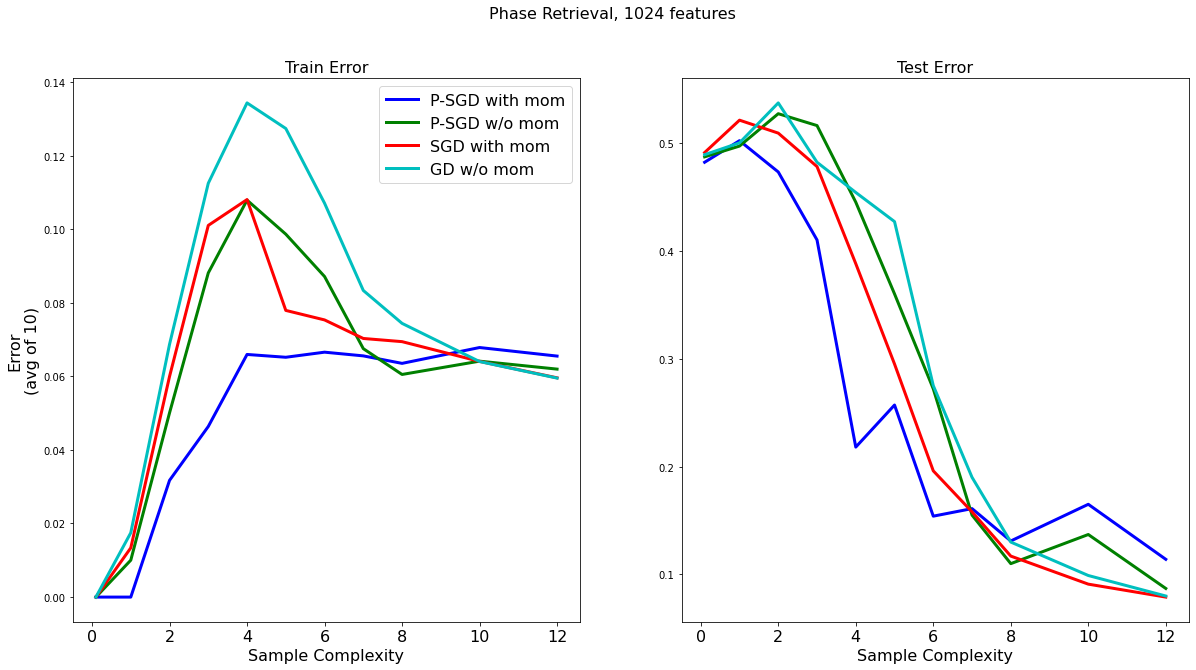

In [118]:
xs = [0.1, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 12.0]
indices = np.array(np.array(xs) * 2 + 0.1, 
                   dtype=int)
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.title("Train Error")
plt.plot(xs, vals[('nes_mom', 'p-sgd', 2)][0, indices], color=colors[0], linewidth=3, label='P-SGD with mom')
plt.plot(xs, vals[('no_mom', 'p-sgd', 2)][0, indices], color=colors[1], linewidth=3, label='P-SGD w/o mom')
plt.plot(xs, vals[('nes_mom', 'sgd', 2)][0, indices], color=colors[2], linewidth=3, label='SGD with mom')
plt.plot(xs, vals[('no_mom', 'gd', 2)][0, indices], color=colors[3], linewidth=3, label='GD w/o mom')
# plt.plot(xs, vals[('no_mom', 'gd')][1, indices], color=colors[0], linewidth=3, label='GD')
# plt.plot(xs, vals[('nes_mom', 'p-sgd')][1, indices], color=colors[1], linewidth=3, label='Nesterov')
# plt.plot(xs, vals['mom_sgd'][2, indices, 2], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['mom_sgd'][5, indices, 2], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_sgd'][10, indices, 2], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot([], [], color='black', linewidth=3, label=r'vanilla SGD')
# plt.plot([], [], '--', color='black', linewidth=3, label=r'persistent-SGD, $\tau = 1.0$')
# plt.plot(xs, vals['mom_psgd'][1, indices, 2], '--', color=colors[0], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][2, indices, 2], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][5, indices, 2], '--', color=colors[2], linewidth=3)
plt.legend(loc='upper right')
plt.suptitle('Phase Retrieval, 1024 features')
plt.xlabel('Sample Complexity')
plt.ylabel('Error\n(avg of 10)')
# plt.ylim(0.0, 0.55)
# plt.savefig('gd_1024_features.pdf')
# plt.show()

# plt.figure(figsize=(12, 5))
plt.subplot(122)
plt.title("Test Error")
plt.plot(xs, vals[('nes_mom', 'p-sgd', 2)][1, indices], color=colors[0], linewidth=3, label='P-SGD with mom')
plt.plot(xs, vals[('no_mom', 'p-sgd', 2)][1, indices], color=colors[1], linewidth=3, label='P-SGD w/o mom')
plt.plot(xs, vals[('nes_mom', 'sgd', 2)][1, indices], color=colors[2], linewidth=3, label='SGD with mom')
plt.plot(xs, vals[('no_mom', 'gd', 2)][1, indices], color=colors[3], linewidth=3, label='GD w/o mom')
plt.xlabel('Sample Complexity')
# plt.ylim(0.0, 0.55)

# plt.ylabel('Sulccess ratio (20 runs)')
# plt.savefig('symmetric_door_1024.pdf')
plt.show()

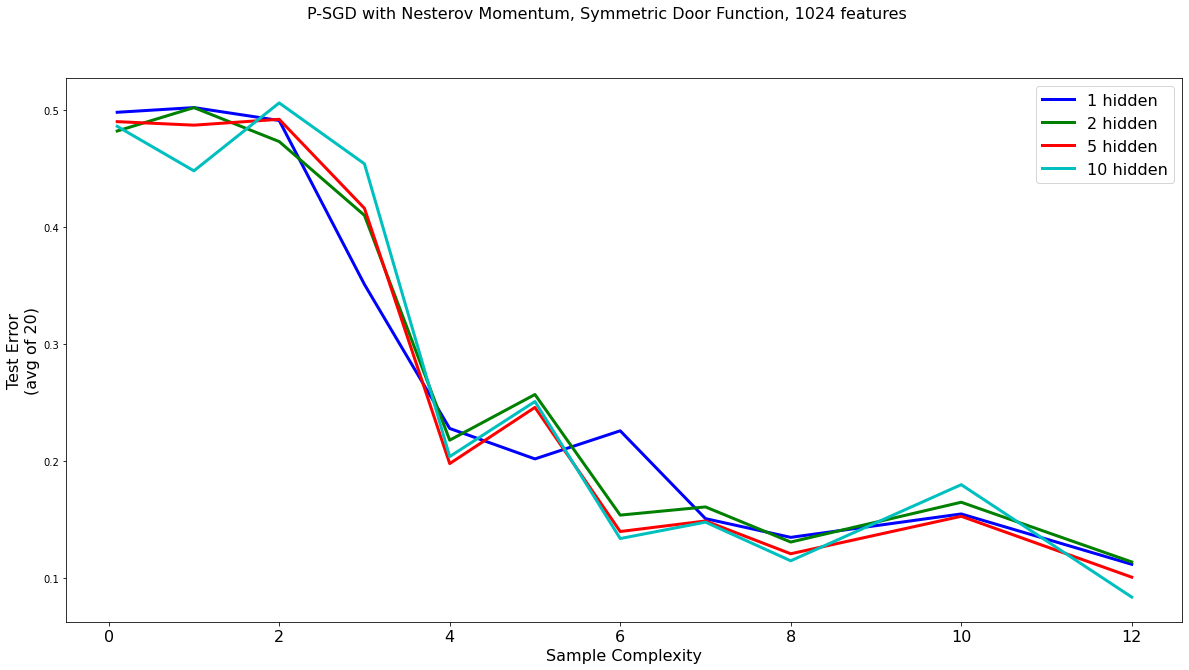

In [117]:
xs = [0.1, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 12.0]
indices = np.array(np.array(xs) * 2 + 0.1, 
                   dtype=int)
plt.figure(figsize=(20, 10))
plt.plot(xs, vals[('nes_mom', 'p-sgd', 1)][1, indices], color=colors[0], linewidth=3, label='1 hidden')
plt.plot(xs, vals[('nes_mom', 'p-sgd', 2)][1, indices], color=colors[1], linewidth=3, label='2 hidden')
plt.plot(xs, vals[('nes_mom', 'p-sgd', 5)][1, indices], color=colors[2], linewidth=3, label='5 hidden')
plt.plot(xs, vals[('nes_mom', 'p-sgd', 10)][1, indices], color=colors[3], linewidth=3, label='10 hidden')
# plt.plot(xs, vals[('no_mom', 'p-sgd', 2)][0, indices], color=colors[1], linewidth=3, label='P-SGD w/o mom')
# plt.plot(xs, vals[('nes_mom', 'sgd', 2)][0, indices], color=colors[2], linewidth=3, label='SGD with mom')
# plt.plot(xs, vals[('no_mom', 'gd', 2)][0, indices], color=colors[3], linewidth=3, label='GD w/o mom')
# plt.plot(xs, vals[('no_mom', 'gd')][1, indices], color=colors[0], linewidth=3, label='GD')
# plt.plot(xs, vals[('nes_mom', 'p-sgd')][1, indices], color=colors[1], linewidth=3, label='Nesterov')
# plt.plot(xs, vals['mom_sgd'][2, indices, 2], color=colors[1], linewidth=3, label='1 layer with 2 units')
# plt.plot(xs, vals['mom_sgd'][5, indices, 2], color=colors[2], linewidth=3, label='1 layer with 5 units')
# plt.plot(xs, vals['no_mom_sgd'][10, indices, 2], color=colors[3], linewidth=3, label='1 layer with 10 units')
# plt.plot([], [], color='black', linewidth=3, label=r'vanilla SGD')
# plt.plot([], [], '--', color='black', linewidth=3, label=r'persistent-SGD, $\tau = 1.0$')
# plt.plot(xs, vals['mom_psgd'][1, indices, 2], '--', color=colors[0], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][2, indices, 2], '--', color=colors[1], linewidth=3)
# plt.plot(xs, vals['mom_psgd'][5, indices, 2], '--', color=colors[2], linewidth=3)
plt.legend(loc='upper right')
plt.suptitle('P-SGD with Nesterov Momentum, Symmetric Door Function, 1024 features')
plt.xlabel('Sample Complexity')
plt.ylabel('Test Error\n(avg of 20)')
# plt.ylim(0.0, 0.55)
# plt.savefig('gd_1024_features.pdf')
# plt.show()

# plt.figure(figsize=(12, 5))
# plt.subplot(122)
# plt.plot(xs, vals[('nes_mom', 'p-sgd', 2)][1, indices], color=colors[0], linewidth=3, label='P-SGD with mom')
# plt.plot(xs, vals[('no_mom', 'p-sgd', 2)][1, indices], color=colors[1], linewidth=3, label='P-SGD w/o mom')
# plt.plot(xs, vals[('nes_mom', 'sgd', 2)][1, indices], color=colors[2], linewidth=3, label='SGD with mom')
# plt.plot(xs, vals[('no_mom', 'gd', 2)][1, indices], color=colors[3], linewidth=3, label='GD w/o mom')
# plt.ylim(0.0, 0.55)

# plt.ylabel('Sulccess ratio (20 runs)')
# plt.savefig('symmetric_door_1024.pdf')
plt.show()

In [93]:
filtered = result[(result['optim'] == 'sgd') & 
       (result['samplecomplexity'] == 10.0) & 
       (result['loss'] == 'logloss') & 
       (result['seed'] == 23)]

In [94]:
filtered['train_loss']

1247    2994.285522
Name: train_loss, dtype: float64

In [25]:
filtered['test_error']

9      0.18
11     0.16
12     0.20
31     0.18
32     0.52
34     0.80
39     0.18
40     0.16
41     0.16
42     0.22
49     0.18
57     0.18
68     0.18
69     0.16
97     1.02
103    0.18
108    0.20
109    0.18
110    0.20
113    0.22
122    0.16
123    0.20
Name: test_error, dtype: float64

In [24]:
filtered['train_error']

9      0.128320
11     0.128125
12     0.129492
31     0.097070
32     0.376563
34     0.546484
39     0.128711
40     0.127148
41     0.128320
42     0.127539
49     0.128320
57     0.126953
68     0.127539
69     0.128125
97     0.997461
103    0.128125
108    0.128320
109    0.107422
110    0.128711
113    0.128320
122    0.128516
123    0.128125
Name: train_error, dtype: float64

In [89]:
np.random.choice([0,1,2,3], p=[0.1, 0.1, 0.3, 0.5])

3